In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colors as mcolors
import scipy as sc
fsize = 17
plt.rcParams['axes.labelsize'] = fsize
plt.rcParams['axes.titlesize'] = fsize
plt.rcParams['xtick.labelsize'] = fsize
plt.rcParams['ytick.labelsize'] = fsize

In [3]:
#old sinh of matrix with series
def oldsinh(m,num):
    a=m
    for n in range(1,num):
        a+=(1/np.math.factorial(2*n+1))*np.linalg.matrix_power(m,2*n+1)
    return a

def eigenexp(A):
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    exp_Lambda = np.diag(np.exp(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    exp_A = V @ exp_Lambda @ V_inv
    
    return exp_A

#new sinh of matrix with eigendecomposition
def expsinh(m):
    return (eigenexp(m)-eigenexp(-m))/2

def sinh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sinh_Lambda = np.diag(np.sinh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sinh_A = V @ sinh_Lambda @ V_inv
    
    return sinh_A

def cosh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    cosh_Lambda = np.diag(np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    cosh_A = V @ cosh_Lambda @ V_inv
    
    return cosh_A





n=5

rm = np.random.rand(n, n)
#print(rm)
#print(eigenexp(rm))
print("exp:")
print(expsinh(rm))
print("sinh:")
print(sinh(rm))
print("series:")
print(oldsinh(rm,3))


exp:
[[0.81070617-4.60472231e-17j 0.99084536-1.49730807e-18j
  1.74932758+1.27660519e-16j 1.11153864-7.20231182e-18j
  0.78953076+1.18915875e-17j]
 [1.58550447-5.89032376e-17j 1.24419777+2.30200936e-18j
  2.16925957+1.92729402e-16j 1.17975081-1.25814197e-17j
  1.51397562+1.44167846e-17j]
 [0.59085372-2.98906891e-17j 0.55726921-2.75230075e-17j
  1.10626853+8.79064758e-17j 0.68311058+1.00550300e-18j
  0.7486839 +3.00342051e-17j]
 [1.05145175-5.49681149e-17j 0.82472925+5.15906576e-17j
  1.77501007+1.80157508e-16j 1.02036942-2.33898401e-17j
  0.75547615-6.32575244e-17j]
 [1.47444402-9.55927844e-17j 1.45125554-2.52954030e-17j
  1.81311059+3.28531347e-16j 1.54589877-1.22987292e-17j
  1.26915079-3.05625444e-18j]]
sinh:
[[0.81070617-4.87573619e-17j 0.99084536-3.76291883e-18j
  1.74932758+1.53196709e-16j 1.11153864-8.81024851e-18j
  0.78953076-9.16651117e-19j]
 [1.58550447-7.18232077e-17j 1.24419777-2.26449174e-17j
  2.16925957+2.60652240e-16j 1.17975081-8.99372402e-18j
  1.51397562+1.41534336e

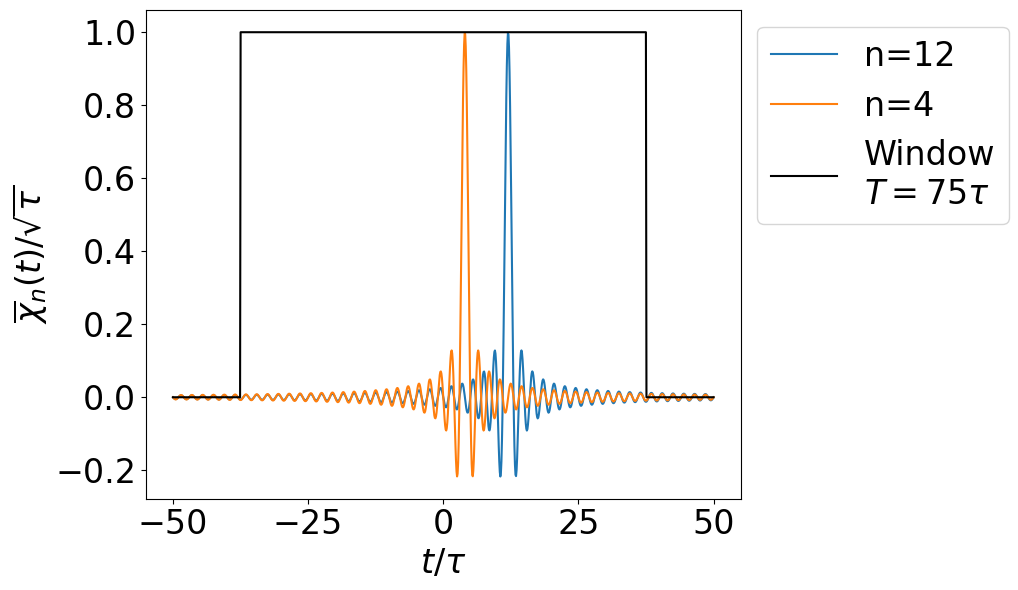

'\n\nfig, axs = plt.subplots(1, 2, figsize=(12, 5))\n\ntvals=np.linspace(-2.3, 2.3, num=1000)\nfor n in [-4,-3,-2,-1,1,2,3,4]:\n    axs[0].plot(tvals, chi(n,tvals,1), color="black", alpha=0.6)\naxs[0].plot(tvals, chi(0,tvals,1),label=r\'$\\overline{\\chi}_0(t)/\\sqrt{\tau}$\', color="red")\naxs[0].set_xlabel(r\'$t/\tau$\', fontsize=fsize)\naxs[0].set_ylabel(r"$\\overline{\\chi}_n(t)/\\sqrt{\tau}$", fontsize=fsize)\naxs[0].legend(fontsize=fsize)\naxs[0].set_title("a)", fontsize=fsize)\n\n\nchivals=-chi2(0,tvals,1)\nfor n in range(-20,21):\n    chivals+=chi2(n,tvals,1)\naxs[1].plot(tvals,chivals, label=r"$\x0crac{1}{\tau}\\sum_{n\neq0}|\\overline{\\chi}_n(t)|^2$", color="grey", alpha=0.8)\naxs[1].plot(tvals, chi2(0,tvals,1),label=r\'$|\\overline{\\chi}_0(t)|^2/\tau$\', color="red")\naxs[1].set_xlabel(r\'$t/\tau$\', fontsize=fsize)\naxs[1].set_ylabel(r"$|\\overline{\\chi}_n(t)|^2/\tau$", fontsize=fsize)\naxs[1].legend(fontsize=fsize)\naxs[1].set_title("b)", fontsize=fsize)\n\nplt.tight_la

In [4]:
Tp=10
Tc=1
Omp=2*np.pi/Tp
Omc=2*np.pi/Tc
sigp=1
sigc=10
fsize=24
#Whittaker-Shannon mode functions
def chi(n,t,T):
    return np.sinc(t/T-n)/np.sqrt(T)

def chi2(n,t,T):
    return (np.sinc(t/T-n)/np.sqrt(T))**2


def window(t,T):
    return np.heaviside(t+T/2,1)-np.heaviside(t-T/2,1)



fig, axs = plt.subplots(1, 1, figsize=(10.5, 6))

tvals=np.linspace(-50, 50, num=1000)

#for n in np.arange(-20,21):
 #   axs.plot(tvals, chi(n,tvals,1), color="black", alpha=0.6)
axs.plot(tvals,chi(12,tvals,1), label="n=12")
axs.plot(tvals,chi(4,tvals,1), label="n=4")
axs.plot(tvals, window(tvals,75), color="black", label="Window\n"+r"$T=75\tau$")
axs.set_xlabel(r'$t/\tau$', fontsize=fsize)
axs.set_ylabel(r"$\overline{\chi}_n(t)/\sqrt{\tau}$", fontsize=fsize)
axs.legend(fontsize=fsize, bbox_to_anchor=(1, 1))
#axs.set_title("b)", fontsize=fsize+2)
axs.tick_params(axis='both', which='major', labelsize=fsize)
plt.tight_layout()
plt.savefig("ChiWindow.pdf")
plt.show()



'''

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

tvals=np.linspace(-2.3, 2.3, num=1000)
for n in [-4,-3,-2,-1,1,2,3,4]:
    axs[0].plot(tvals, chi(n,tvals,1), color="black", alpha=0.6)
axs[0].plot(tvals, chi(0,tvals,1),label=r'$\overline{\chi}_0(t)/\sqrt{\tau}$', color="red")
axs[0].set_xlabel(r'$t/\tau$', fontsize=fsize)
axs[0].set_ylabel(r"$\overline{\chi}_n(t)/\sqrt{\tau}$", fontsize=fsize)
axs[0].legend(fontsize=fsize)
axs[0].set_title("a)", fontsize=fsize)


chivals=-chi2(0,tvals,1)
for n in range(-20,21):
    chivals+=chi2(n,tvals,1)
axs[1].plot(tvals,chivals, label=r"$\frac{1}{\tau}\sum_{n\neq0}|\overline{\chi}_n(t)|^2$", color="grey", alpha=0.8)
axs[1].plot(tvals, chi2(0,tvals,1),label=r'$|\overline{\chi}_0(t)|^2/\tau$', color="red")
axs[1].set_xlabel(r'$t/\tau$', fontsize=fsize)
axs[1].set_ylabel(r"$|\overline{\chi}_n(t)|^2/\tau$", fontsize=fsize)
axs[1].legend(fontsize=fsize)
axs[1].set_title("b)", fontsize=fsize)

plt.tight_layout()
plt.show()

#Whittaker-Shannon mode functions
def chi(n,t,T):
    return np.sinc(t/T-n)/np.sqrt(T)

tvals=np.linspace(-2.3, 2.3, num=1000)
chivals=-chi(0,tvals,1)
for n in range(-20,21):
    chivals+=chi(n,tvals,1)
plt.plot(tvals,chivals, label=r"$\frac{1}{\sqrt{\tau}}\sum_{n\neq0}\overline{\chi}_n(t)$", color="grey", alpha=0.8)
plt.plot(tvals, chi(0,tvals,1),label=r'$\overline{\chi}_0(t)/\sqrt{\tau}$', color="red")
plt.xlabel(r'$t/\tau$', fontsize=fsize)
plt.ylabel(r"$\overline{\chi}_n(t)/\tau$", fontsize=fsize)
plt.legend(fontsize=fsize)
plt.show()
'''

In [5]:
#defining specific functions

#sinc-hat in freqeuncy, function of w/Omc
def wsinchat(w1,w2):
    return (np.heaviside((w1-w2)+Omc,1)-np.heaviside((w1-w2)-Omc,1))*np.sinc(np.pi/Omp*(w1+w2))/np.sqrt(Omp*Omc)

#sinc-hat in time
def sinchat(t1,t2):
    return (np.heaviside((t1+t2)+Tp,1)-np.heaviside((t1+t2)-Tp,1))*np.sinc(np.pi/Tc*(t1-t2))/np.sqrt(Tp*Tc)

#rnm matrix of sinchat
def WSsinchat(n,m):
    if n==m:
        return 1
    else:
        return 0



#double gaussian in frequency
def wdubgauss(w1,w2):
    return np.sqrt(1/(np.pi*sigp*sigc))*np.exp(-((w1-w2)/(2*sigc))**2)*np.exp(-((w1+w2)/(2*sigp))**2)

#double gaussian in time
def dubgauss(t1,t2):
    return np.sqrt(sigc*sigp/np.pi)*np.exp(-((t1-t2)*sigc/2)**2)*np.exp(-((t1+t2)*sigp/2)**2)

#rnm matrix of double gaussian
def WSdubgauss(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)



#vert sinc-hat in freqeuncy
def wvsinchat(w1,w2):
    return (np.heaviside((w2)+Omc,1)-np.heaviside((w2)-Omc,1))*np.sinc(np.pi/Omp*(w1))/np.sqrt(Omp*Omc)

#vert sinc-hat in time
def vsinchat(t1,t2):
    return (np.heaviside((t1)+Tp,1)-np.heaviside((t1)-Tp,1))*np.sinc(np.pi/Tc*(t2))/np.sqrt(Tp*Tc)
    

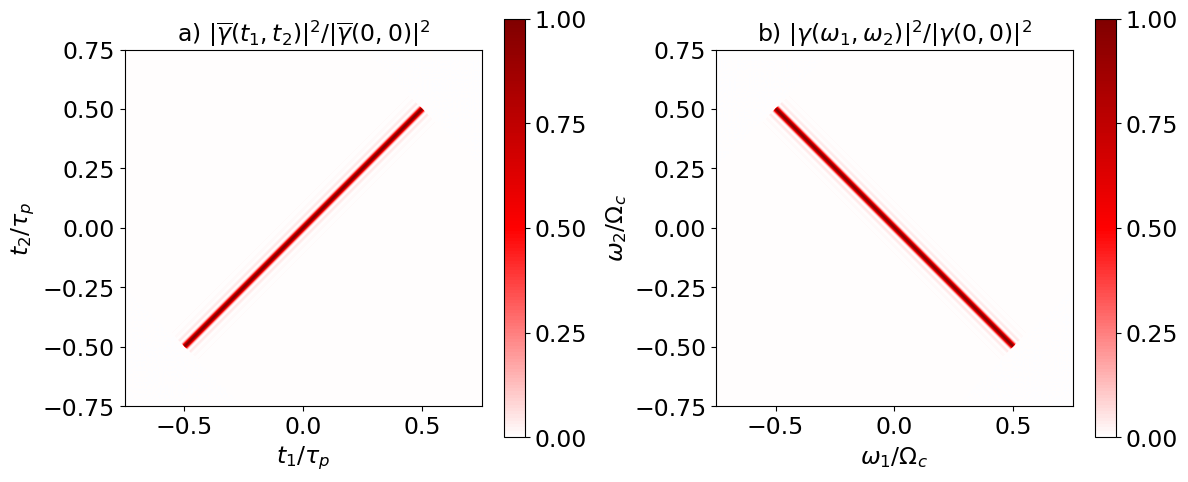

In [4]:
Tp=1
Tc=0.1
Omp=0.1
Omc=1
fsize=17


# Generate the grid of values
x = np.linspace(-0.75, 0.75, 1000)
y = np.linspace(-0.75, 0.75, 1000)
x, y = np.meshgrid(x, y)

#discrete grid for the rnm




# Calculate z values using the function
zsh = (sinchat(x, y)/sinchat(0,0))**2
zwsh = (wsinchat(x, y)/wsinchat(0,0))**2
#zWSsh = WSsinchat(x, y)






# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Define different colormaps and normalization for each subplot
colormap = "seismic"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

# Plot the heatmap
im = axs[0].imshow(zsh, extent=[-0.75, 0.75, -0.75, 0.75], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$t_1/\tau_p$", fontsize=fsize)
axs[0].set_ylabel(r"$t_2/\tau_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0])
cbar_ticks = np.linspace(0, 1, num=5)
cbar.ax.set_ylim(0,1)
cbar.set_ticks(cbar_ticks)

im = axs[1].imshow(zwsh, extent=[-0.75, 0.75, -0.75, 0.75], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$\omega_1/\Omega_c$", fontsize=fsize)
axs[1].set_ylabel(r"$\omega_2/\Omega_c$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)



# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

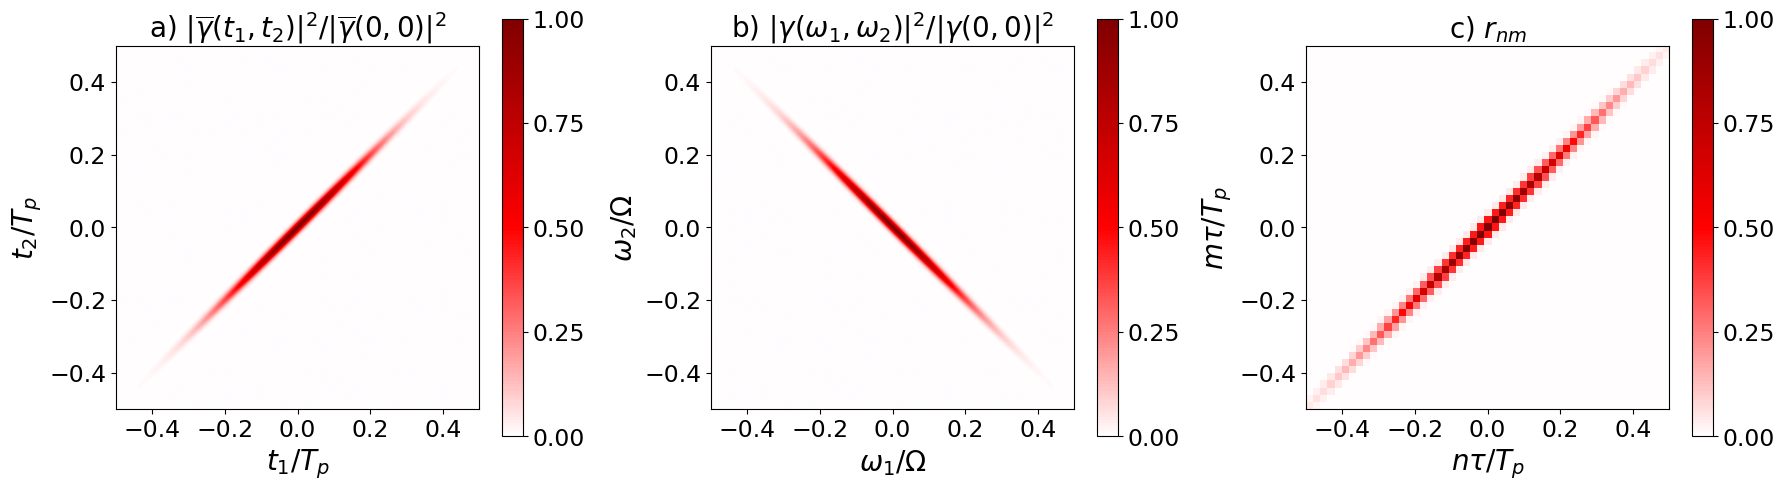

In [5]:
fsize=20

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Define different colormaps and normalization for each subplot
colormap = "seismic"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

# Generate the grid of values
x = np.linspace(-0.5, 0.5, 1000)
y = np.linspace(-0.5, 0.5, 1000)
x, y = np.meshgrid(x, y)

#discrete values for rnm
num=25
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


sigp=2*np.sqrt(np.pi)
sigc=sigp*25

zdg = (dubgauss(x, y)/dubgauss(0, 0))**2

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/25
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = WSdubgauss(ns, ms)


# Plot the heatmap
im = axs[0].imshow(zdg, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0])
cbar_ticks = np.linspace(0, 1, num=5)
cbar.ax.set_ylim(0,1)
cbar.set_ticks(cbar_ticks)


im = axs[1].imshow(zwdg, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$\omega_1/\Omega$", fontsize=fsize)
axs[1].set_ylabel(r"$\omega_2/\Omega$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)


im = axs[2].imshow(zWSdg, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $r_{nm}$", fontsize=fsize)
axs[2].set_xlabel(r"$n\tau/T_p$", fontsize=fsize)
axs[2].set_ylabel(r"$m\tau/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2])
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)



# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

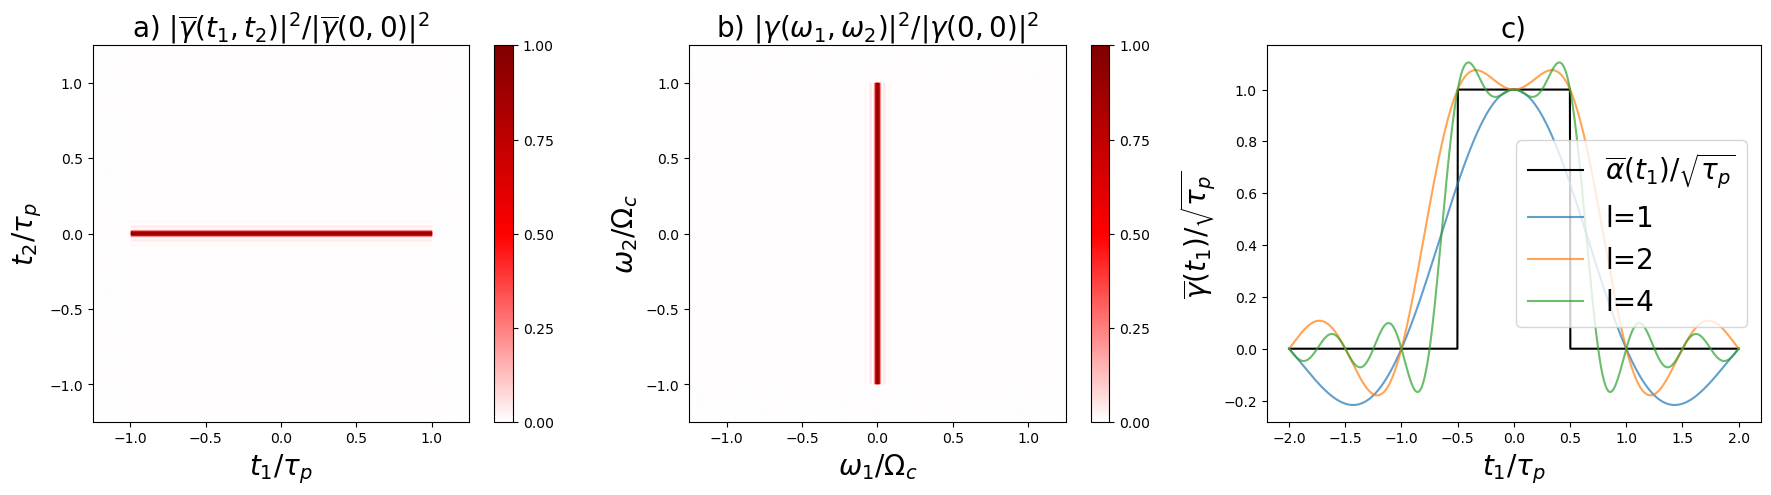

In [83]:
Tp=1
Tc=0.1
Omp=0.1
Omc=1
fsize=20


# Generate the grid of values
x = np.linspace(-1.25, 1.25, 1000)
y = np.linspace(-1.25, 1.25, 1000)
x, y = np.meshgrid(x, y)

#discrete grid for the rnm




# Calculate z values using the function
zsh = (vsinchat(x, y)/sinchat(0,0))**2
zwsh = (wvsinchat(x, y)/wsinchat(0,0))**2
#zWSsh = WSsinchat(x, y)

taup=1

#vertical sinc-hat plots

#took out 1/sqrt(taup) factor

def VSHapprox(t,l):
    sum=0
    for n in range(-int(l/2),int(l/2)+1):
        sum += np.sinc(l*t-n)
    return sum
        
tvals=np.linspace(-2,2,1000)




# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Define different colormaps and normalization for each subplot
colormap = "seismic"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

# Plot the heatmap
im = axs[0].imshow(zsh, extent=[-1.25, 1.25, -1.25, 1.25], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$t_1/\tau_p$", fontsize=fsize)
axs[0].set_ylabel(r"$t_2/\tau_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0])
cbar_ticks = np.linspace(0, 1, num=5)
cbar.ax.set_ylim(0,1)
cbar.set_ticks(cbar_ticks)

im = axs[1].imshow(zwsh, extent=[-1.25, 1.25, -1.25, 1.25], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$\omega_1/\Omega_c$", fontsize=fsize)
axs[1].set_ylabel(r"$\omega_2/\Omega_c$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)


axs[2].plot(tvals,alpha(tvals),label=r"$\overline{\alpha}(t_1)/\sqrt{\tau_p}$",color="black")
for l in [1,2,4]:
    axs[2].plot(tvals,VSHapprox(tvals,l),alpha=0.7,label="l="+str(l))
axs[2].legend(fontsize=fsize)
axs[2].set_xlabel(r"$t_1/\tau_p$", fontsize=fsize)
axs[2].set_ylabel(r"$\overline{\gamma}(t_1)/\sqrt{\tau_p}$", fontsize=fsize)
axs[2].set_title("c)", fontsize=fsize)


# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

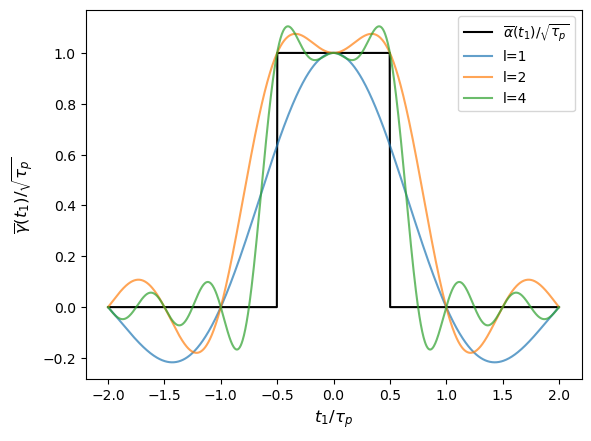

In [6]:
taup=1

#vertical sinc-hat plots

#took out 1/sqrt(taup) factor

def alpha(t):
    return np.heaviside(t+taup/2,1)-np.heaviside(t-taup/2,1)


def VSHapprox(t,l):
    sum=0
    for n in range(-int(l/2),int(l/2)+1):
        sum += np.sinc(l*t-n)
    return sum
        
tvals=np.linspace(-2,2,1000)

plt.plot(tvals,alpha(tvals),label=r"$\overline{\alpha}(t_1)/\sqrt{\tau_p}$",color="black")
for l in [1,2,4]:
    plt.plot(tvals,VSHapprox(tvals,l),alpha=0.7,label="l="+str(l))
plt.legend()
plt.xlabel(r"$t_1/\tau_p$", fontsize=12)
plt.ylabel(r"$\overline{\gamma}(t_1)/\sqrt{\tau_p}$", fontsize=12)
plt.show()

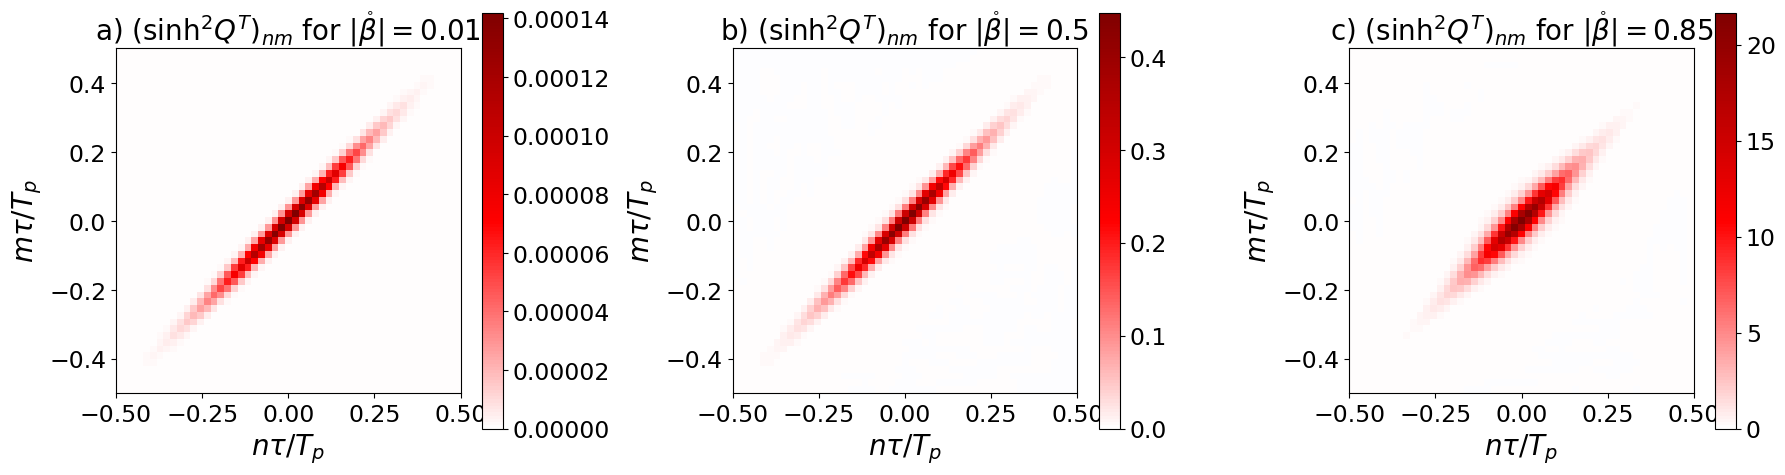

In [9]:
#first order G plot
import scipy as sc

sigp=1/25
sigc=1
fsize=20
num=25


#rnm matrix of double gaussian
def WSDG(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)


def rnm(num):
    b=[]
    for i in range(-num,num+1):
        row=[]
        for k in range(-num,num+1):
            row.append(WSDG(i,k))
        b.append(row)        
    return np.array(b)


# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Define different colormaps and normalization for each subplot
colormap = "seismic"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap


betac=0.01

B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(sinhQ2))


# Plot the heatmap
im = axs[0].imshow(sinhQ2, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $(\sinh^2Q^T)_{nm}$ for $|\mathring{\beta}|=0.01$", fontsize=fsize)
axs[0].set_xlabel(r"$n\tau/T_p$", fontsize=fsize)
axs[0].set_ylabel(r"$m\tau/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylim(0,np.max(sinhQ2))


betac=0.5

B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(sinhQ2))


# Plot the heatmap
im = axs[1].imshow(sinhQ2, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $(\sinh^2Q^T)_{nm}$ for $|\mathring{\beta}|=0.5$", fontsize=fsize)
axs[1].set_xlabel(r"$n\tau/T_p$", fontsize=fsize)
axs[1].set_ylabel(r"$m\tau/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylim(0,np.max(sinhQ2))


betac=1.5

B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(sinhQ2))


# Plot the heatmap
im = axs[2].imshow(sinhQ2, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $(\sinh^2Q^T)_{nm}$ for $|\mathring{\beta}|=0.85$", fontsize=fsize)
axs[2].set_xlabel(r"$n\tau/T_p$", fontsize=fsize)
axs[2].set_ylabel(r"$m\tau/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2])
cbar.ax.set_ylim(0,np.max(sinhQ2))
plt.tight_layout()
plt.show()


betac=0.85
sinhQ=sinh(Q)
expsinhQ=expsinh(Q)

#diff=oldsinhQ-sinhQ
#print(diff[10,10])

'''
fig, axs = plt.subplots(1, 3, figsize=(18, 5))


# Plot the heatmap
im = axs[1].imshow(sinhQ, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylim(0,np.max(sinhQ))

im = axs[2].imshow(newsinhQ, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
cbar = fig.colorbar(im, ax=axs[2])
cbar.ax.set_ylim(0,np.max(sinhQ))
'''



# Adjust layout to make sure subplots fit well


# Show the plot
plt.show()

KeyboardInterrupt: 

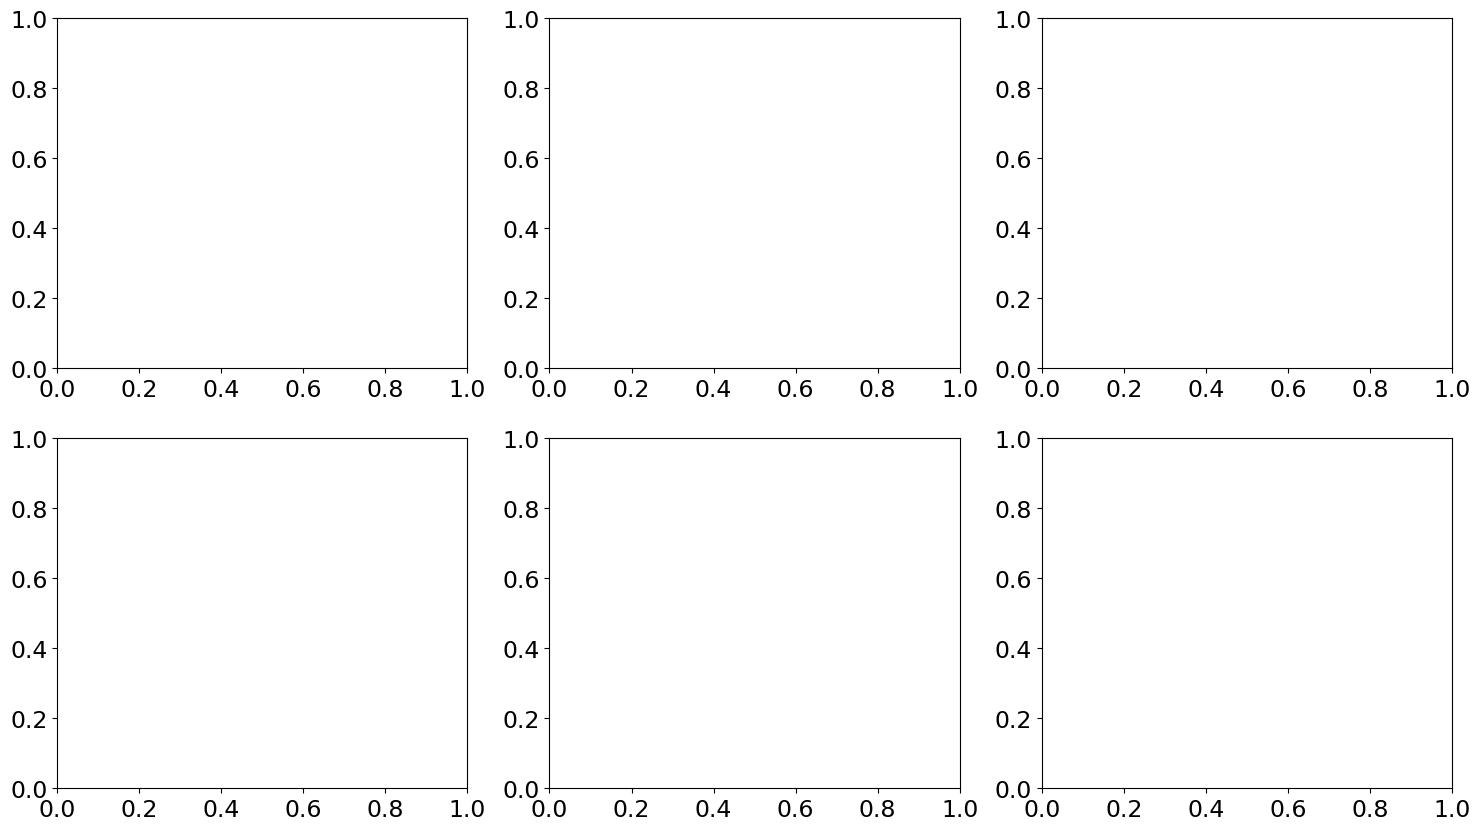

In [42]:
#plotting G1s
num=25
fsize=20

sigp=2*np.sqrt(np.pi)
sigc=sigp*25

#for normalization
tau=1/50


#we set T=tau=1 here
def chi(n,t):
    return np.sinc(t/tau-n)/np.sqrt(tau)

#vector of chi modes
def chivec(t):
    vec=[]
    for n in range(-num,num+1):
        vec.append(chi(n,t))
    return np.array(vec)



#rnm matrix of double gaussian
def WSDG(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)


def rnm(num):
    b=[]
    for i in range(-num,num+1):
        row=[]
        for k in range(-num,num+1):
            row.append(WSDG(i,k))
        b.append(row)        
    return np.array(b)


#G functions defined with matrix multiplication
def Ga(t1,t2):
    return np.dot(chivec(t1),np.matmul(sinhQ2,np.transpose(chivec(t2))))

def Gab(t1,t2):
    return np.dot(chivec(t1),np.matmul(SCU,np.transpose(chivec(t2))))

def G2a(t1,t2):
    return (Ga(t1,t2))**2+Ga(t1,t1)*Ga(t2,t2)

def G2ab(t1,t2):
    return (Gab(t1,t2))**2+Ga(t1,t1)*Ga(t2,t2)
       
    
    
# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Define different colormaps and normalization for each subplot
colormap = "seismic"


# Generate the grid of values
xvals = np.linspace(-0.5, 0.5, 100)
yvals = np.linspace(-0.5, 0.5, 100)

betac=0.1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2a(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,0].set(aspect='equal')
axs[0,0].set_title(r"a) $\overline{G}^{(2)}_a(t_1,t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2ab(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,0].set(aspect='equal')
axs[1,0].set_title(r"d) $\overline{G}^{(2)}_{ab}(t_1,t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,0])
cbar.ax.set_ylim(0,np.max(data))



betac=1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2a(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,1].set(aspect='equal')
axs[0,1].set_title(r"b) $\overline{G}^{(2)}_a(t_1,t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2ab(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,1].set(aspect='equal')
axs[1,1].set_title(r"e) $\overline{G}^{(2)}_{ab}(t_1,t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,1])
cbar.ax.set_ylim(0,np.max(data))


betac=2
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2a(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,2].set(aspect='equal')
axs[0,2].set_title(r"c) $\overline{G}^{(2)}_a(t_1,t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,2])
cbar.ax.set_ylim(0,1)
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2ab(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,2].set(aspect='equal')
axs[1,2].set_title(r"f) $\overline{G}^{(2)}_{ab}(t_1,t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,2])
cbar.ax.set_ylim(0,np.max(data))

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

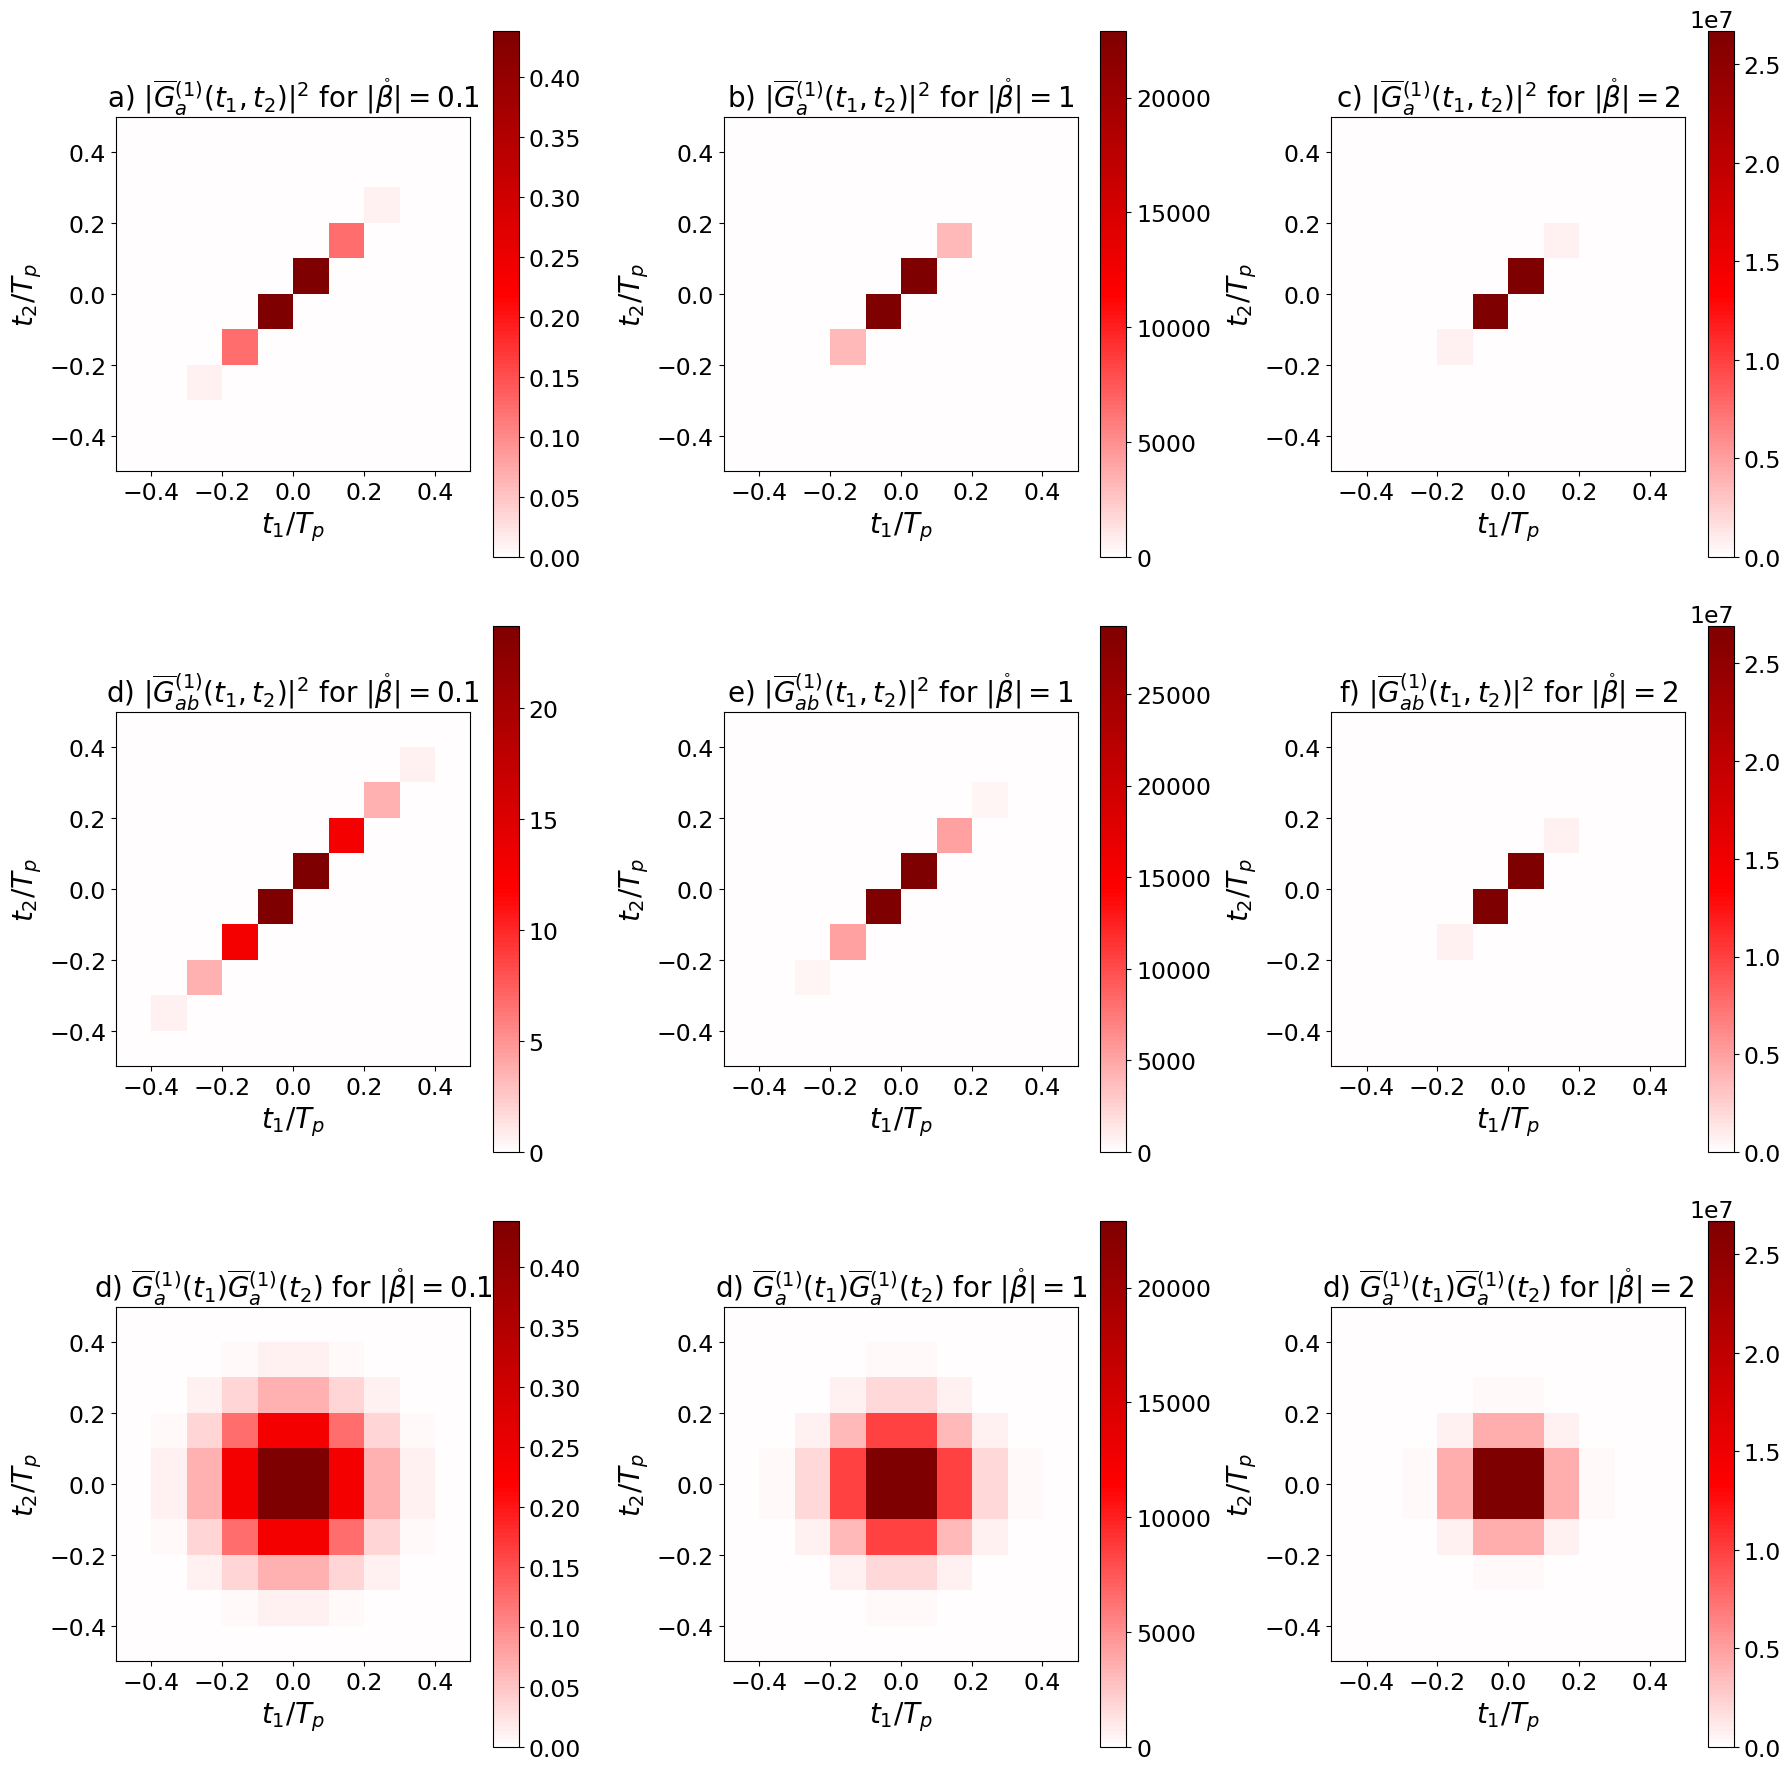

In [43]:
#plotting G1s
num=25
fsize=20

sigp=2*np.sqrt(np.pi)
sigc=sigp*25

#for normalization
tau=1/50


#we set T=tau=1 here
def chi(n,t):
    return np.sinc(t/tau-n)/np.sqrt(tau)

#vector of chi modes
def chivec(t):
    vec=[]
    for n in range(-num,num+1):
        vec.append(chi(n,t))
    return np.array(vec)



#rnm matrix of double gaussian
def WSDG(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)


def rnm(num):
    b=[]
    for i in range(-num,num+1):
        row=[]
        for k in range(-num,num+1):
            row.append(WSDG(i,k))
        b.append(row)        
    return np.array(b)


#G functions defined with matrix multiplication
def Ga(t1,t2):
    return np.dot(chivec(t1),np.matmul(sinhQ2,np.transpose(chivec(t2))))

def Gab(t1,t2):
    return np.dot(chivec(t1),np.matmul(SCU,np.transpose(chivec(t2))))
       
    
    
# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Define different colormaps and normalization for each subplot
colormap = "seismic"


# Generate the grid of values
xvals = np.linspace(-0.5, 0.5, 10)
yvals = np.linspace(-0.5, 0.5, 10)

betac=0.1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,0].set(aspect='equal')
axs[0,0].set_title(r"a) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,0].set(aspect='equal')
axs[1,0].set_title(r"d) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga(i,i)*Ga(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,0].set(aspect='equal')
axs[2,0].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,0])
cbar.ax.set_ylim(0,np.max(data))



betac=1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,1].set(aspect='equal')
axs[0,1].set_title(r"b) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,1].set(aspect='equal')
axs[1,1].set_title(r"e) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga(i,i)*Ga(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,1].set(aspect='equal')
axs[2,1].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,1])
cbar.ax.set_ylim(0,np.max(data))


betac=2
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,2].set(aspect='equal')
axs[0,2].set_title(r"c) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,2])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,2].set(aspect='equal')
axs[1,2].set_title(r"f) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,2])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga(i,i)*Ga(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,2].set(aspect='equal')
axs[2,2].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,2])
cbar.ax.set_ylim(0,np.max(data))

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

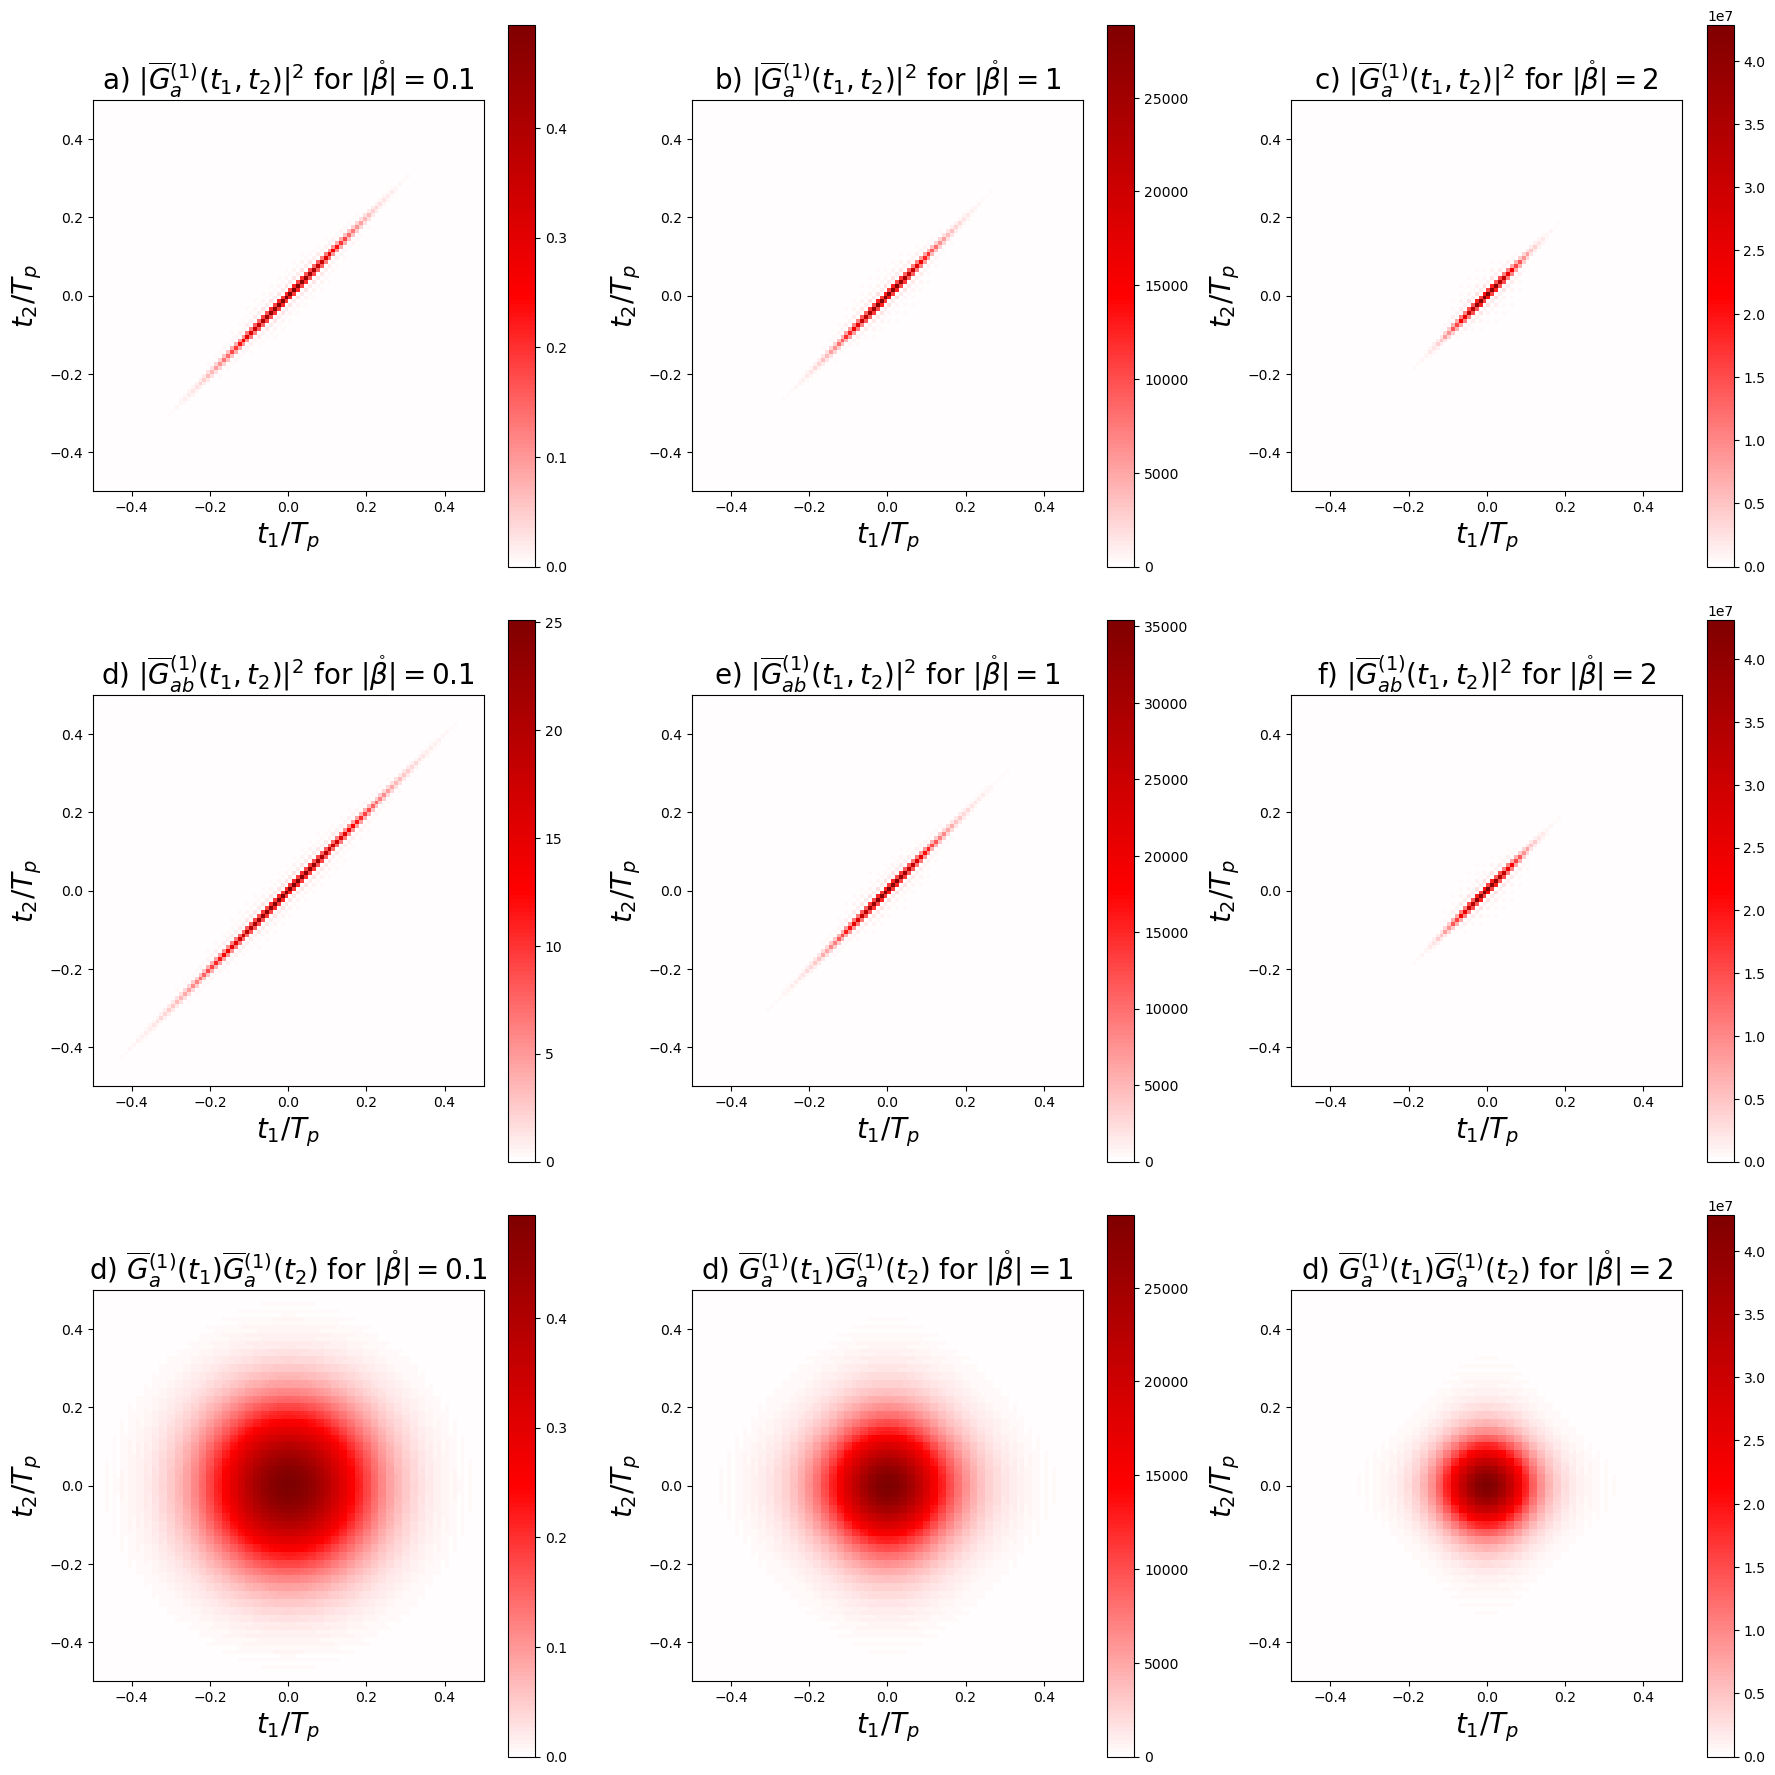

In [20]:
#looking at only close index terms to try and interpret correlations as coming from only "same pair" terms

num=25
fsize=20

sigp=2*np.sqrt(np.pi)
sigc=sigp*25

#for normalization
tau=1/50


#we set T=tau=1 here
def chi(n,t):
    return np.sinc(t/tau-n)/np.sqrt(tau)

#vector of chi modes
def chivec(t):
    vec=[]
    for n in range(-num,num+1):
        vec.append(chi(n,t))
    return np.array(vec)



#rnm matrix of double gaussian
def WSDG(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)


def rnm(num):
    b=[]
    for i in range(-num,num+1):
        row=[]
        for k in range(-num,num+1):
            row.append(WSDG(i,k))
        b.append(row)        
    return np.array(b)


#G functions defined with matrix multiplication
def Ga0(t1,t2):
    sum=0
    vec1=chivec(t1)
    vec2=chivec(t2)
    for n in range(len(vec1)):
        sum+=(vec1[n])*sinhQ2[n,n]*(vec2[n])
    return sum

def Gab0(t1,t2):
    sum=0
    vec1=chivec(t1)
    vec2=chivec(t2)
    for n in range(len(vec1)):
        sum+=(vec1[n])*SCU[n,n]*(vec2[n])
    return sum

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Define different colormaps and normalization for each subplot
colormap = "seismic"


# Generate the grid of values
xvals = np.linspace(-0.5, 0.5, 100)
yvals = np.linspace(-0.5, 0.5, 100)

betac=0.1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,0].set(aspect='equal')
axs[0,0].set_title(r"a) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,0].set(aspect='equal')
axs[1,0].set_title(r"d) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,i)*Ga0(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,0].set(aspect='equal')
axs[2,0].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,0])
cbar.ax.set_ylim(0,np.max(data))



betac=1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,1].set(aspect='equal')
axs[0,1].set_title(r"b) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,1].set(aspect='equal')
axs[1,1].set_title(r"e) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,i)*Ga0(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,1].set(aspect='equal')
axs[2,1].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,1])
cbar.ax.set_ylim(0,np.max(data))


betac=2
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,2].set(aspect='equal')
axs[0,2].set_title(r"c) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,2])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,2].set(aspect='equal')
axs[1,2].set_title(r"f) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,2])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,i)*Ga0(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,2].set(aspect='equal')
axs[2,2].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,2])
cbar.ax.set_ylim(0,np.max(data))

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

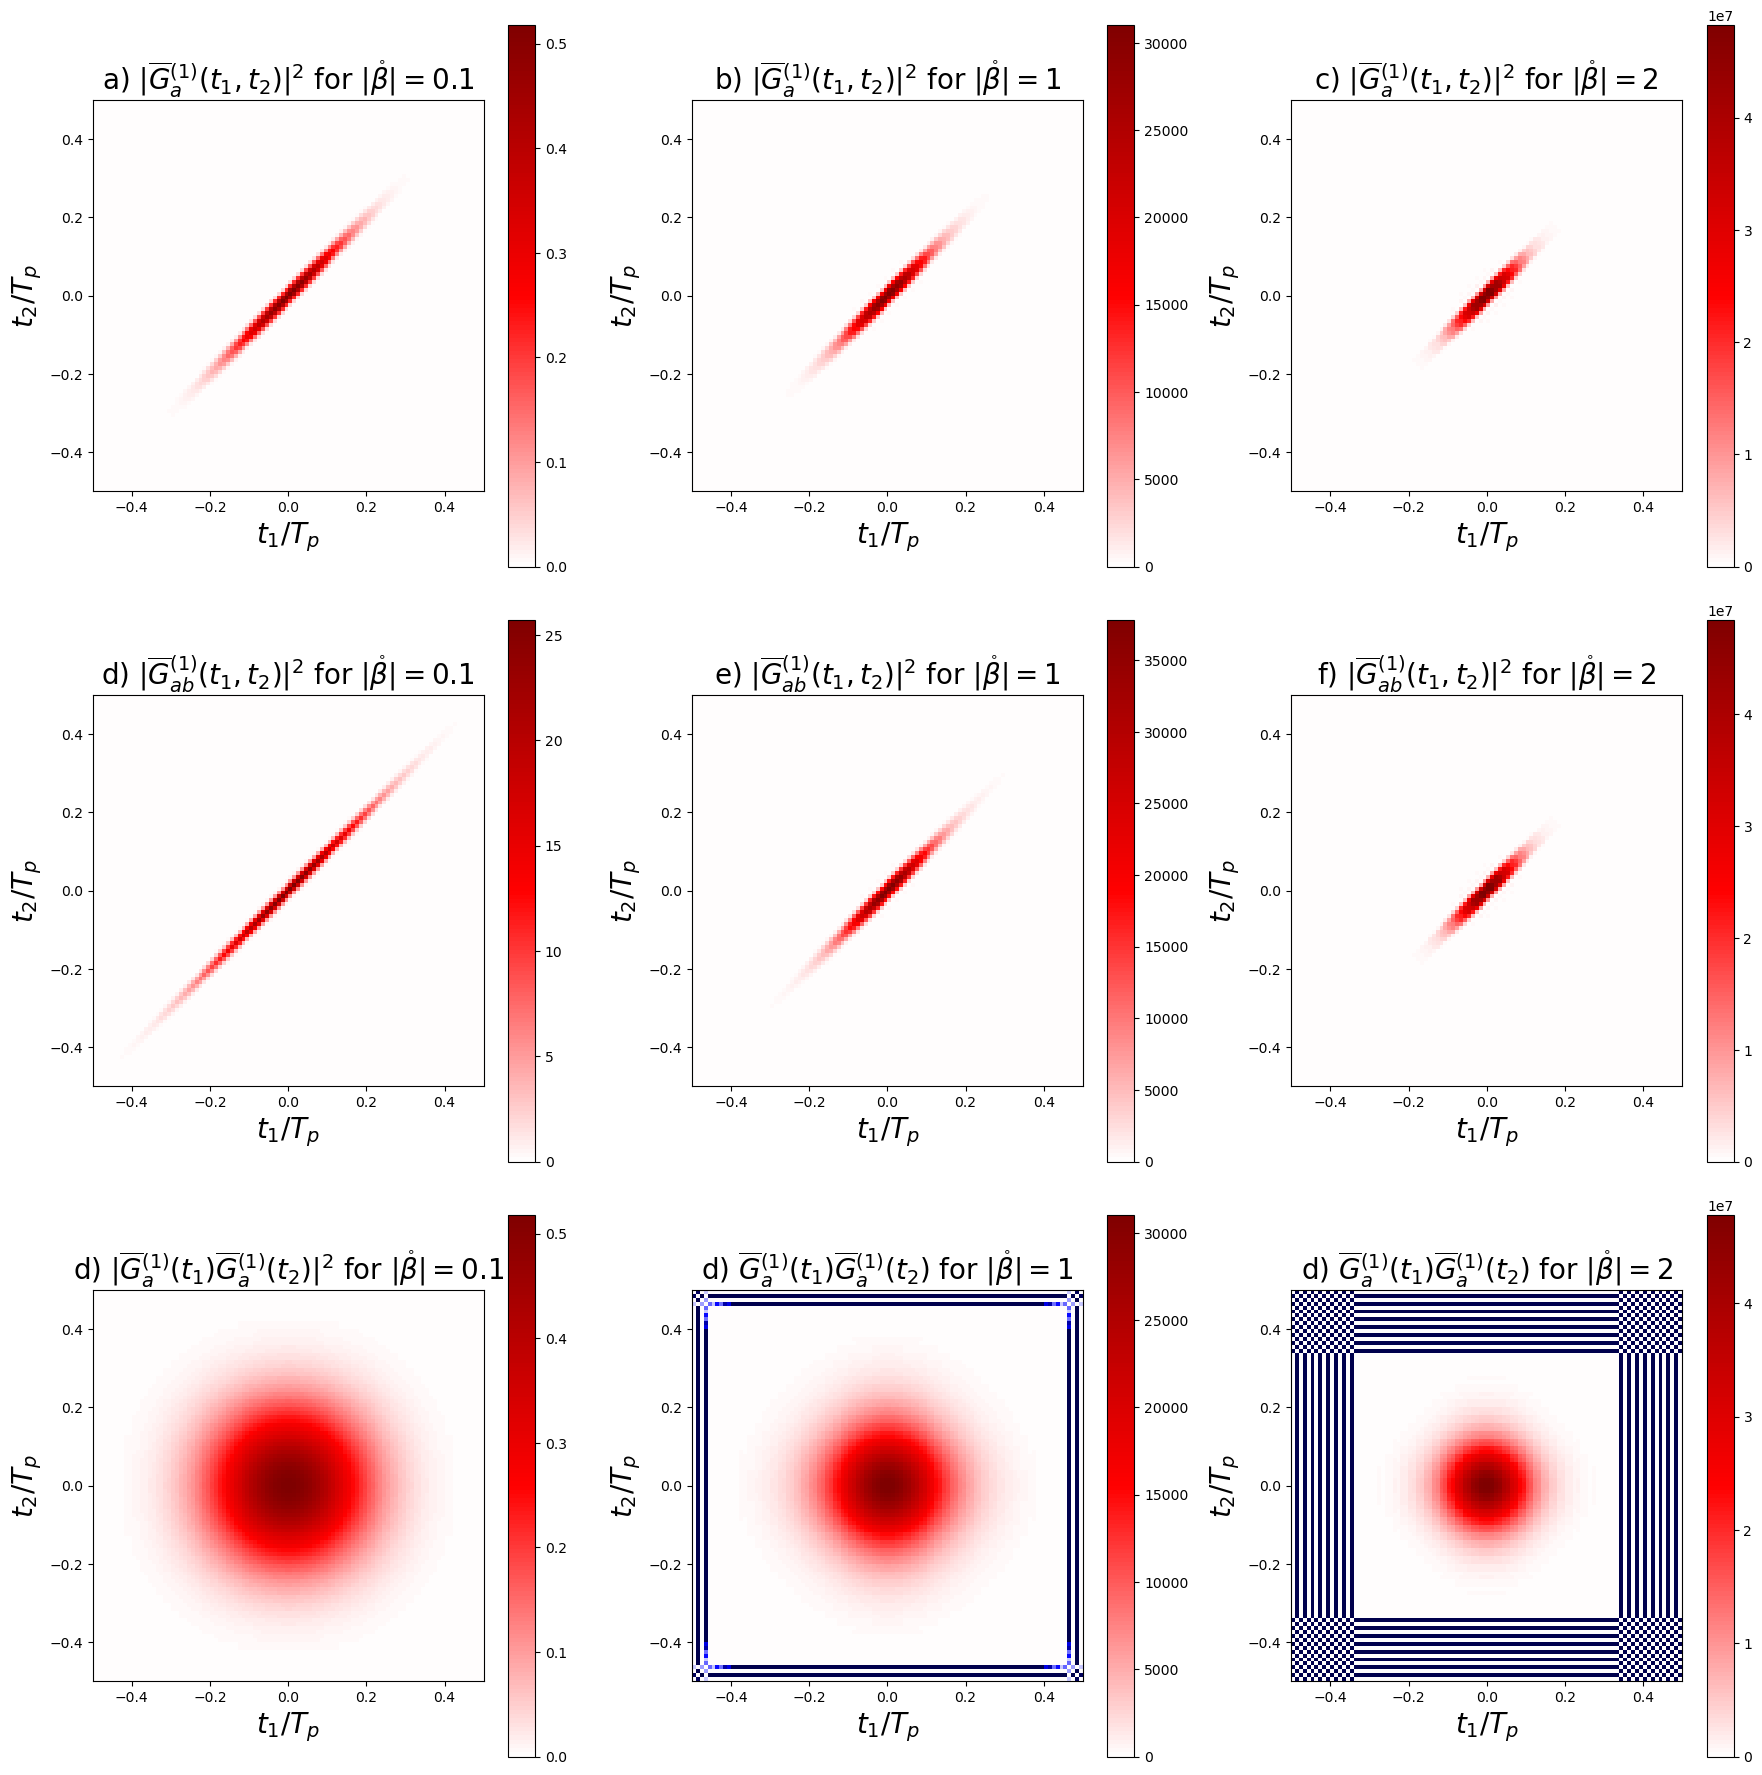

In [14]:
#same but now we inc;ude next nearest neighbors

num=25
fsize=20

sigp=2*np.sqrt(np.pi)
sigc=sigp*25

#for normalization
tau=1/50


#we set T=tau=1 here
def chi(n,t):
    return np.sinc(t/tau-n)/np.sqrt(tau)

#vector of chi modes
def chivec(t):
    vec=[]
    for n in range(-num,num+1):
        vec.append(chi(n,t))
    return np.array(vec)



#rnm matrix of double gaussian
def WSDG(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)


def rnm(num):
    b=[]
    for i in range(-num,num+1):
        row=[]
        for k in range(-num,num+1):
            row.append(WSDG(i,k))
        b.append(row)        
    return np.array(b)


#G functions defined with matrix multiplication
def Ga0(t1,t2):
    vec1=chivec(t1)
    vec2=chivec(t2)
    sum=(vec1[0])*sinhQ2[0,1]*(vec2[1])+(vec1[2*num])*sinhQ2[2*num,2*num-1]*(vec2[2*num-1])
    sum+=(vec1[0])*sinhQ2[0,0]*(vec2[0])+(vec1[2*num])*sinhQ2[2*num,2*num]*(vec2[2*num])
    for n in range(2*num-1):
        sum+=(vec1[n+1])*sinhQ2[n+1,n+2]*(vec2[n+2])+(vec1[n+1])*sinhQ2[n+1,n]*(vec2[n])
        sum+=(vec1[n+1])*sinhQ2[n+1,n+1]*(vec2[n+1])
    return sum

def Gab0(t1,t2):
    vec1=chivec(t1)
    vec2=chivec(t2)
    sum=(vec1[0])*SCU[0,1]*(vec2[1])+(vec1[2*num])*SCU[2*num,2*num-1]*(vec2[2*num-1])
    sum+=(vec1[0])*SCU[0,0]*(vec2[0])+(vec1[2*num])*SCU[2*num,2*num]*(vec2[2*num])
    for n in range(2*num-1):
        sum+=(vec1[n+1])*SCU[n+1,n+2]*(vec2[n+2])+(vec1[n+1])*SCU[n+1,n]*(vec2[n])
        sum+=(vec1[n+1])*SCU[n+1,n+1]*(vec2[n+1])
    return sum

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Define different colormaps and normalization for each subplot
colormap = "seismic"


# Generate the grid of values
xvals = np.linspace(-0.5, 0.5, 100)
yvals = np.linspace(-0.5, 0.5, 100)

betac=0.1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,0].set(aspect='equal')
axs[0,0].set_title(r"a) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,0].set(aspect='equal')
axs[1,0].set_title(r"d) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,i)*Ga0(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,0].set(aspect='equal')
axs[2,0].set_title(r"d) $|\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,0])
cbar.ax.set_ylim(0,np.max(data))



betac=1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,1].set(aspect='equal')
axs[0,1].set_title(r"b) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,1].set(aspect='equal')
axs[1,1].set_title(r"e) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,i)*Ga0(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,1].set(aspect='equal')
axs[2,1].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,1])
cbar.ax.set_ylim(0,np.max(data))


betac=2
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,2].set(aspect='equal')
axs[0,2].set_title(r"c) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,2])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Gab0(i,j)**2)
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,2].set(aspect='equal')
axs[1,2].set_title(r"f) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,2])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(Ga0(i,i)*Ga0(j,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[2,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2,2].set(aspect='equal')
axs[2,2].set_title(r"d) $\overline{G}^{(1)}_{a}(t_1)\overline{G}^{(1)}_{a}(t_2)$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[2,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2,2])
cbar.ax.set_ylim(0,np.max(data))

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

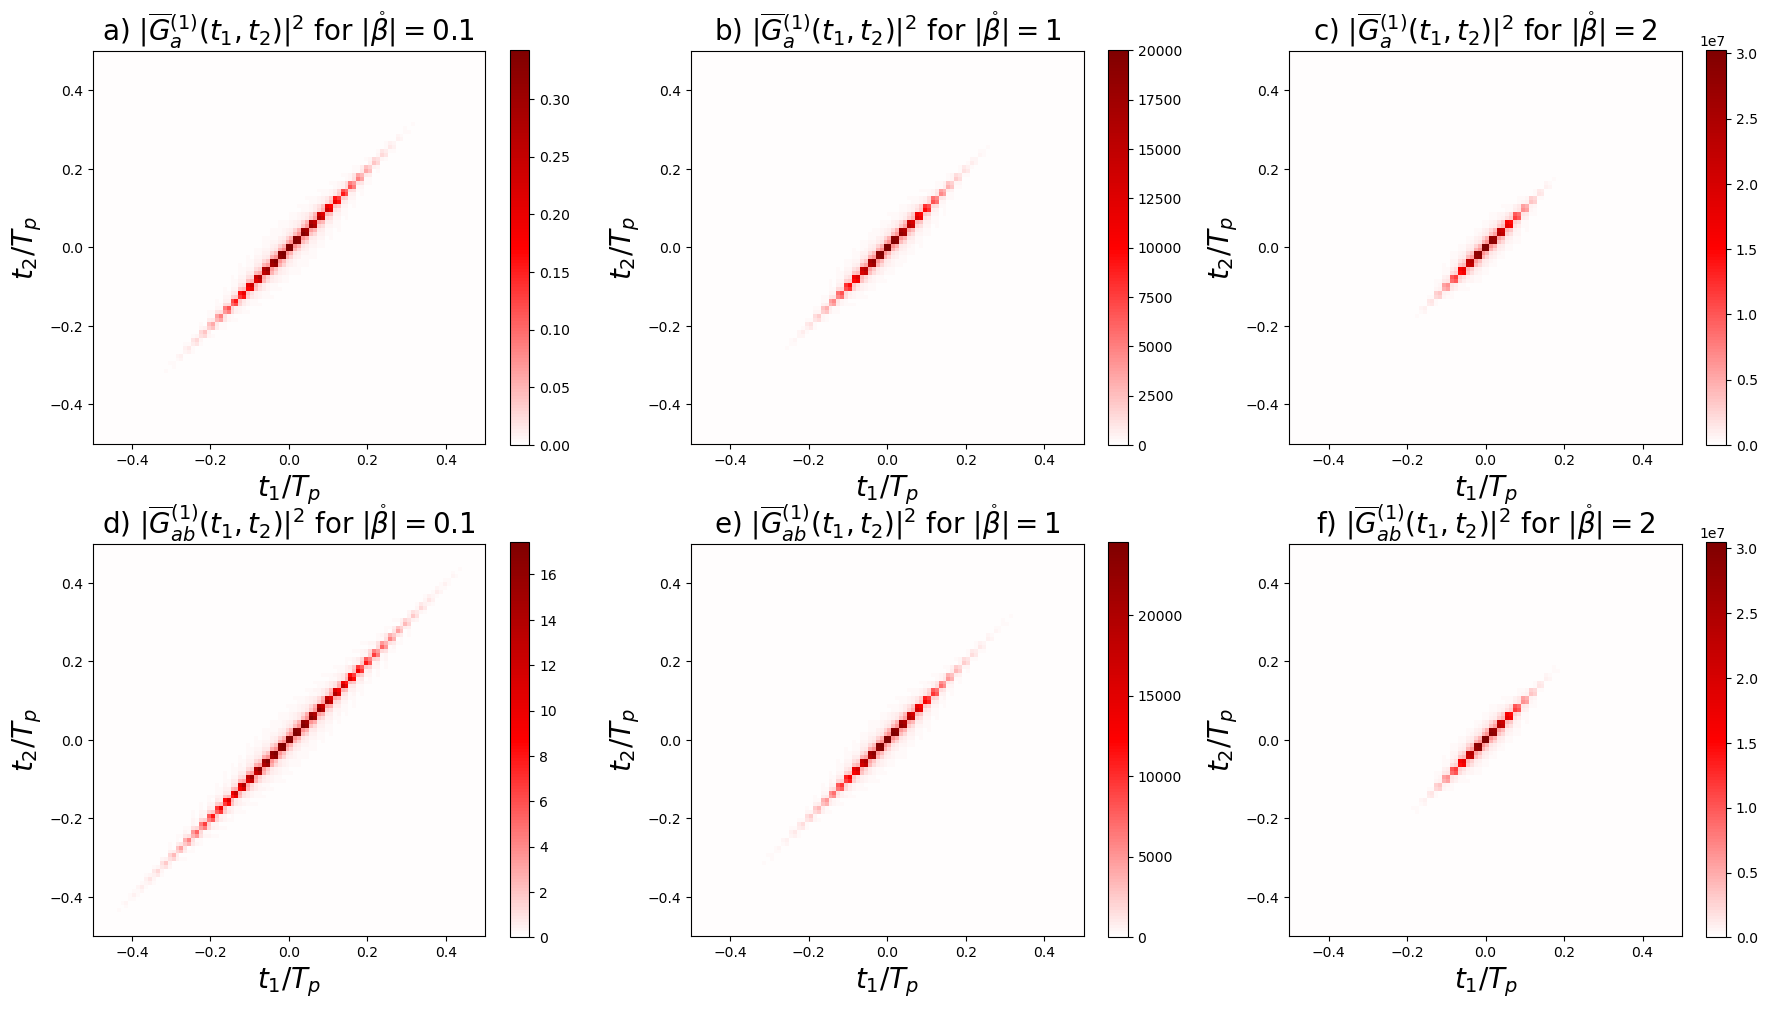

In [16]:
#now look at same n and nearest neighbors in quadruple sum

num=25
fsize=20

sigp=2*np.sqrt(np.pi)
sigc=sigp*25

#for normalization
tau=1/50


#we set T=tau=1 here
def chi(n,t):
    return np.sinc(t/tau-n)/np.sqrt(tau)

#vector of chi modes
def chivec(t):
    vec=[]
    for n in range(-num,num+1):
        vec.append(chi(n,t))
    return np.array(vec)



#rnm matrix of double gaussian
def WSDG(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)


def rnm(num):
    b=[]
    for i in range(-num,num+1):
        row=[]
        for k in range(-num,num+1):
            row.append(WSDG(i,k))
        b.append(row)        
    return np.array(b)


#G functions defined with matrix multiplication
def sqGa0(t1,t2):
    vec1=chivec(t1)
    vec2=chivec(t2)
    sum=0
    for n in range(2*num+1):
        sum+=((vec1[n])*sinhQ2[n,n]*(vec2[n]))**2
    return sum

def sqGab0(t1,t2):
    vec1=chivec(t1)
    vec2=chivec(t2)
    sum=0
    for n in range(2*num+1):
        sum+=((vec1[n])*SCU[n,n]*(vec2[n]))**2
    return sum

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Define different colormaps and normalization for each subplot
colormap = "seismic"


# Generate the grid of values
xvals = np.linspace(-0.5, 0.5, 100)
yvals = np.linspace(-0.5, 0.5, 100)

betac=0.1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(sqGa0(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,0].set(aspect='equal')
axs[0,0].set_title(r"a) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,0])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(sqGab0(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,0].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,0].set(aspect='equal')
axs[1,0].set_title(r"d) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,0])
cbar.ax.set_ylim(0,np.max(data))



betac=1
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(sqGa0(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,1].set(aspect='equal')
axs[0,1].set_title(r"b) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,1])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(sqGab0(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,1].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,1].set(aspect='equal')
axs[1,1].set_title(r"e) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,1])
cbar.ax.set_ylim(0,np.max(data))



betac=2
B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(sqGa0(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,2].set(aspect='equal')
axs[0,2].set_title(r"c) $|\overline{G}^{(1)}_a(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,2])
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(sqGab0(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,2].imshow(data, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,2].set(aspect='equal')
axs[1,2].set_title(r"f) $|\overline{G}^{(1)}_{ab}(t_1,t_2)|^2$ for $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,2])
cbar.ax.set_ylim(0,np.max(data))



# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
np.arange(-4,4)

array([-4, -3, -2, -1,  0,  1,  2,  3])

In [44]:
#checking that other terms are supressed in approx for P_x in CLEO abstract
import scipy as sc

sigp=1/1000
sigc=1
fsize=20
num=100


#rnm matrix of double gaussian
def WSDG(n,m):
    return np.exp(-np.pi*((n-m)/2)**2)*np.exp(-np.pi*((n+m)*sigp/(2*sigc))**2)


def rnm(num):
    b=[]
    for i in range(-num,num+1):
        row=[]
        for k in range(-num,num+1):
            row.append(WSDG(i,k))
        b.append(row)        
    return np.array(b)

betac=0.2

B=betac*rnm(num)
U, Q = sc.linalg.polar(B, side = "left")

def tanh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    tanh_Lambda = np.diag(np.tanh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    tanh_A = V @ tanh_Lambda @ V_inv
    
    return tanh_A

print(np.trace(np.linalg.matrix_power(tanh(Q),2))**3)
print((np.trace(np.linalg.matrix_power(tanh(Q),2)))*(np.trace(np.linalg.matrix_power(tanh(Q),4))))
print(np.trace(np.linalg.matrix_power(tanh(Q),6)))
print(np.trace(np.linalg.matrix_power(sinh(Q),2))**2)
print(np.trace(np.linalg.matrix_power(sinh(Q),4)))


1123.3775311618513
10.84862724578004
0.12095702359954452
134.0269317120965
1.3390893095336862


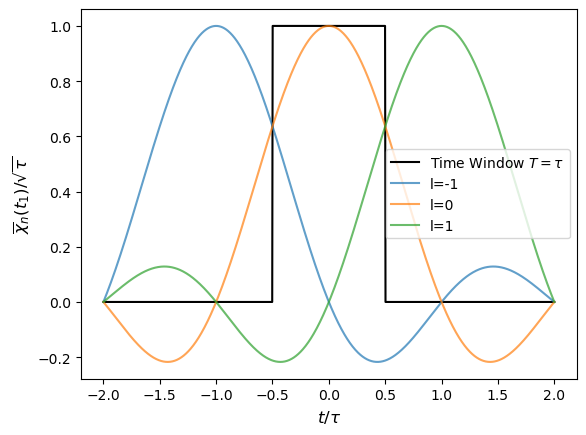

In [13]:
tau=1

#vertical sinc-hat plots

#took out 1/sqrt(taup) factor

def alpha(t):
    return np.heaviside(t+tau/2,1)-np.heaviside(t-tau/2,1)


def VSHapprox(t,l):
    sum=0
    for n in range(-int(l/2),int(l/2)+1):
        sum += np.sinc(l*t-n)
    return sum
        
tvals=np.linspace(-2,2,1000)

plt.plot(tvals,alpha(tvals),label=r"Time Window $T=\tau$",color="black")
for l in [-1,0,1]:
    plt.plot(tvals,chi(l,tvals,1),alpha=0.7,label="l="+str(l))
plt.legend()
plt.xlabel(r"$t/\tau$", fontsize=12)
plt.ylabel(r"$\overline{\chi}_n(t_1)/\sqrt{\tau}$", fontsize=12)
plt.show()

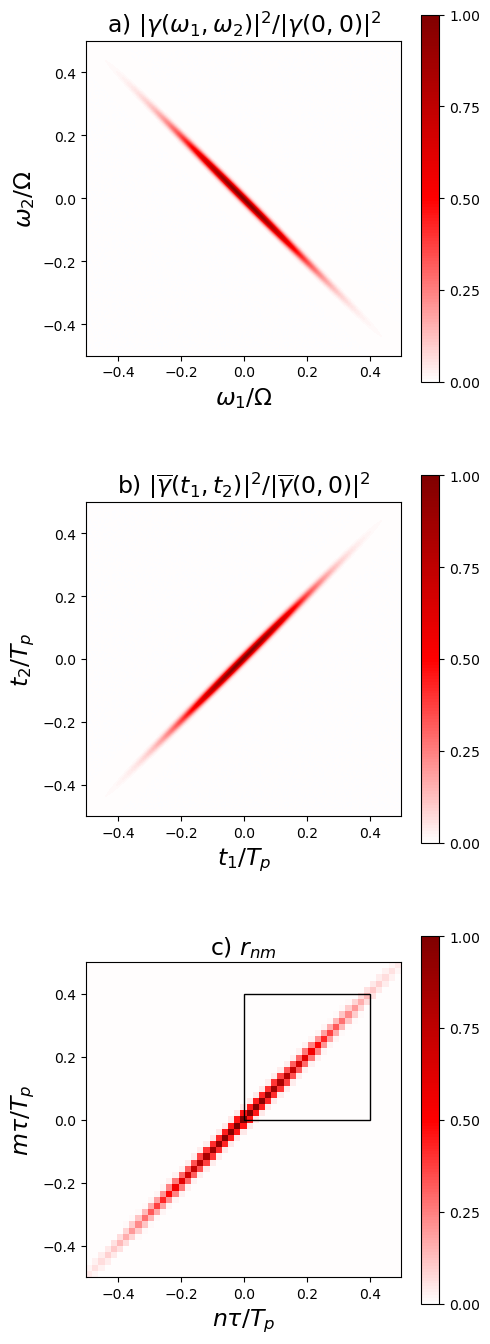

In [32]:
#plots of double gaussian and rnm for paper
fsize=17

#ratio of sigc/sigp
ratio = 25

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(3, 1, figsize=(5, 14))

# Define different colormaps and normalization for each subplot
colormap = "seismic"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

# Generate the grid of values
x = np.linspace(-0.5, 0.5, 1000)
y = np.linspace(-0.5, 0.5, 1000)
x, y = np.meshgrid(x, y)

#discrete values for rnm
num=25
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


sigp=2*np.sqrt(np.pi)
sigc=sigp*ratio

zdg = (dubgauss(x, y)/dubgauss(0, 0))**2

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/ratio
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = WSdubgauss(ns, ms)


# Plot the heatmap


im = axs[0].imshow(zwdg, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$\omega_1/\Omega$", fontsize=fsize)
axs[0].set_ylabel(r"$\omega_2/\Omega$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)


im = axs[1].imshow(zdg, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1])
cbar_ticks = np.linspace(0, 1, num=5)
cbar.ax.set_ylim(0,1)
cbar.set_ticks(cbar_ticks)

from matplotlib.patches import Rectangle

# Create a Rectangle patch
rect = Rectangle((0,0),0.4,0.4,linewidth=1,edgecolor='black',facecolor='none')

# Add the patch to the Axes
axs[2].add_patch(rect)


im = axs[2].imshow(zWSdg, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $r_{nm}$", fontsize=fsize)
axs[2].set_xlabel(r"$n\tau/T_p$", fontsize=fsize)
axs[2].set_ylabel(r"$m\tau/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2])
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)



# Adjust layout to make sure subplots fit well
plt.tight_layout()

plt.savefig("DGfig.pdf")

# Show the plot
plt.show()

31


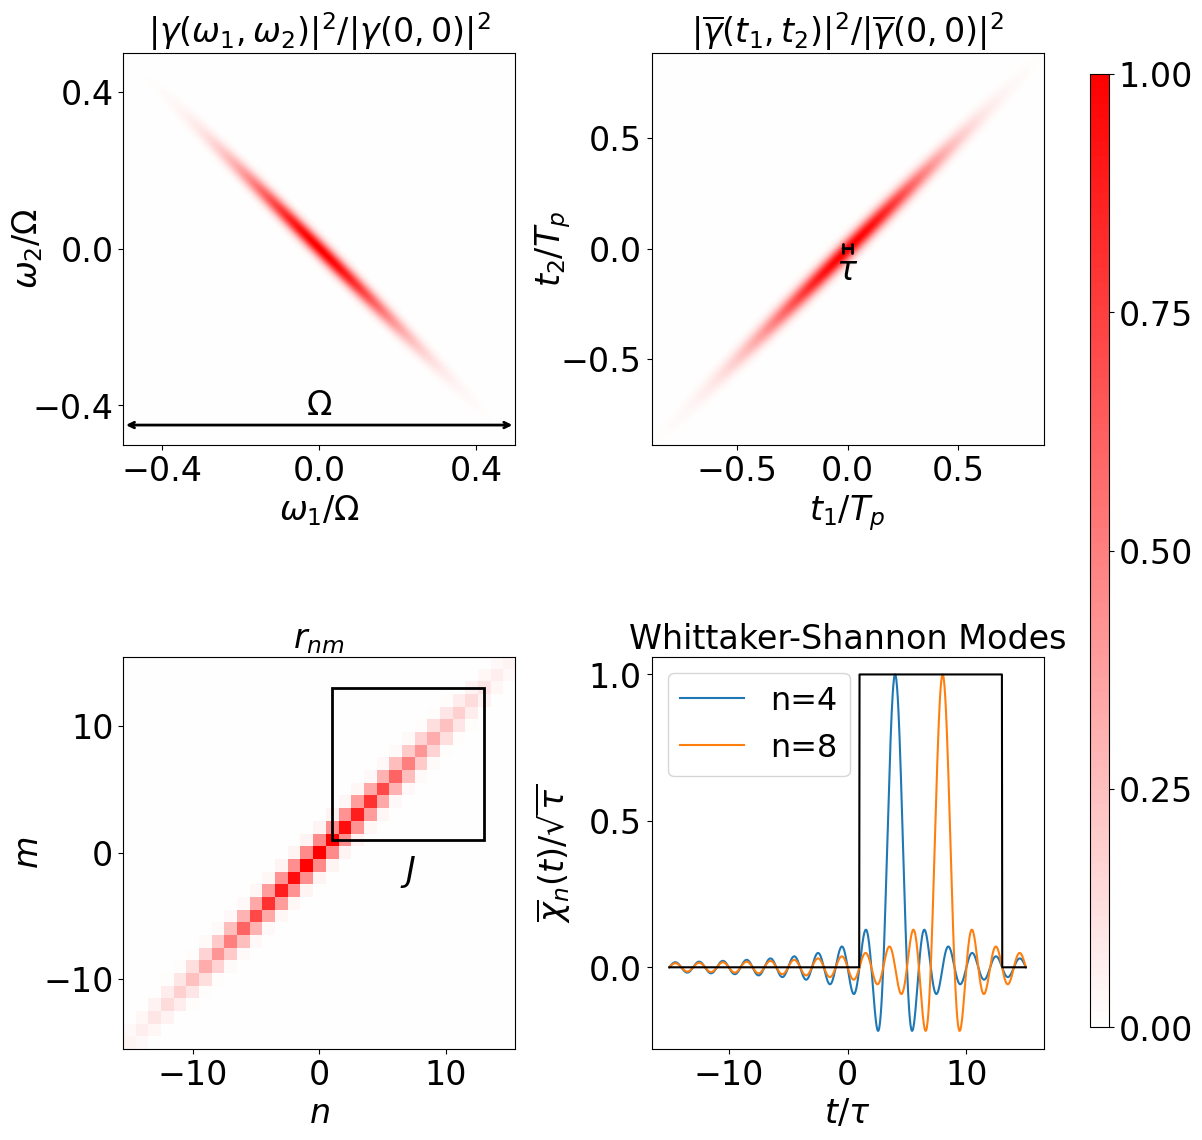

In [28]:
#plots of double gaussian and rnm for poster
fsize=24

#ratio of sigc/sigp
ratio = 15

Tp=1
Tc=Tp/ratio


#double gaussian in frequency
def wdubgauss(w1,w2):
    return np.sqrt(Tc*Tp/(np.pi**2))*np.exp(-((w1-w2)*Tc/(2*np.sqrt(np.pi)))**2)*np.exp(-((w1+w2)*Tp/(2*np.sqrt(np.pi)))**2)

#double gaussian in time
def dubgauss(t1,t2):
    return np.sqrt(1/(Tc*Tp))*np.exp(-(np.sqrt(np.pi)*(t1-t2)/(2*Tc))**2)*np.exp(-(np.sqrt(np.pi)*(t1+t2)/(2*Tp))**2)

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)



# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
#fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Define different colormaps and normalization for each subplot
colormap = "bwr"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc

wdim=Omega/2


#discrete values for rnm
num=ratio
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


x = np.linspace(-tdim, tdim, 1000)
y = np.linspace(-tdim, tdim, 1000)
x, y = np.meshgrid(x, y)
zdg = (dubgauss(x, y)/dubgauss(0, 0))**2


# Generate the grid of values
x = np.linspace(-wdim, wdim, 1000)
y = np.linspace(-wdim, wdim, 1000)
x, y = np.meshgrid(x, y)

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/ratio
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = rnm_dg(ns, ms)


# Plot the heatmap


wdim=0.5
im = axs[0,0].imshow(zwdg, extent=[-wdim, wdim, -wdim, wdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,0].set(aspect='equal')
axs[0,0].set_title(r"$|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[0,0].set_xlabel(r"$\omega_1/\Omega$", fontsize=fsize)
axs[0,0].set_ylabel(r"$\omega_2/\Omega$", fontsize=fsize)
axs[0,0].tick_params(axis='both', which='major', labelsize=fsize)
axs[0,0].set_xticks([-0.4,0,0.4])
axs[0,0].set_yticks([-0.4,0,0.4])
#cbar = fig.colorbar(im, ax=axs[0,0], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
axs[0,0].annotate(
    "", 
    xy=(-0.5, -0.45), 
    xytext=(0.5, -0.45),
    arrowprops=dict(
        arrowstyle="<->",
        color='black',
        lw=2
    )
)

# Optional: Add a label to explain what the arrow is
axs[0,0].text(0, -0.4, r"$\Omega$", ha='center', va='center', fontsize=fsize)


im = axs[0,1].imshow(zdg, extent=[-tdim, tdim, -tdim, tdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,1].set(aspect='equal')
axs[0,1].set_title(r"$|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[0,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
axs[0,1].tick_params(axis='both', which='major', labelsize=fsize)
#axs[0,1].xticks(np.arange(, , step=2))
#cbar = fig.colorbar(im, ax=axs[0,1], fraction=0.046, pad=0.04)
#cbar_ticks = np.linspace(0, 1, num=5)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(cbar_ticks)

graphtau = Tc
axs[0,1].annotate(
    "", 
    xy=(-graphtau/2, 0), 
    xytext=(graphtau/2, 0),
    arrowprops=dict(
        arrowstyle="|-|",
        color='black',
        lw=2,
        mutation_scale=3
    )
)


# Optional: Add a label to explain what the arrow is
axs[0,1].text(0, -0.1, r"$\tau$", ha='center', va='center', fontsize=fsize)

from matplotlib.patches import Rectangle

t0=7
T=12
# Create a Rectangle patch
rect = Rectangle((t0-T/2,t0-T/2),T,T,linewidth=2,edgecolor='black',facecolor='none')

# Add the patch to the Axes
axs[1,0].add_patch(rect)

dim = len(zWSdg)
print(dim)
im = axs[1,0].imshow(zWSdg, extent=[-dim/2, dim/2, -dim/2, dim/2], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,0].set(aspect='equal')
axs[1,0].set_title(r"$r_{nm}$", fontsize=fsize)
axs[1,0].set_xlabel(r"$n$", fontsize=fsize)
axs[1,0].set_ylabel(r"$m$", fontsize=fsize)
axs[1,0].tick_params(axis='both', which='major', labelsize=fsize)
#cbar = fig.colorbar(im, ax=axs[1,0], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
axs[1,0].text(t0, -1.5, r"$J$", ha='center', va='center', fontsize=fsize)


tvals=np.linspace(-ratio, ratio, num=1000)


def window(t,T,t0):
    return np.heaviside(t-t0+T/2,1)-np.heaviside(t-t0-T/2,1)


n1=4
n2=8
#for n in np.arange(-20,21):
 #   axs.plot(tvals, chi(n,tvals,1), color="black", alpha=0.6)
axs[1,1].plot(tvals,chi(n1,tvals,1), label="n="+str(n1))
axs[1,1].plot(tvals,chi(n2,tvals,1), label="n="+str(n2))
axs[1,1].plot(tvals, window(tvals,T,t0), color="black")
#axs[1,1].plot(tvals, window(tvals,20,10), color="black", label="Window\n"+r"$T=20\tau$")
axs[1,1].set_xlabel(r'$t/\tau$', fontsize=fsize)
axs[1,1].set_ylabel(r"$\overline{\chi}_n(t)/\sqrt{\tau}$", fontsize=fsize)
axs[1,1].legend(fontsize=fsize-1, loc="upper left")
axs[1,1].set_title("Whittaker-Shannon Modes", fontsize=fsize)
axs[1,1].tick_params(axis='both', which='major', labelsize=fsize)
axs[1,1].set_box_aspect(1)
#dummy_cb = fig.colorbar(im, ax=axs[1,1])
#dummy_cb.remove()


for i in range(2):
    for j in range(2):
        axs[i,j].yaxis.set_label_coords(-0.2, 0.5)


cbar = fig.colorbar(im, ax=axs[:, :], location='right', aspect=50, shrink=0.8)
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=fsize)

# Adjust layout to make sure subplots fit well
#plt.tight_layout()

plt.savefig("DGfig.pdf")

# Show the plot
plt.show()

31


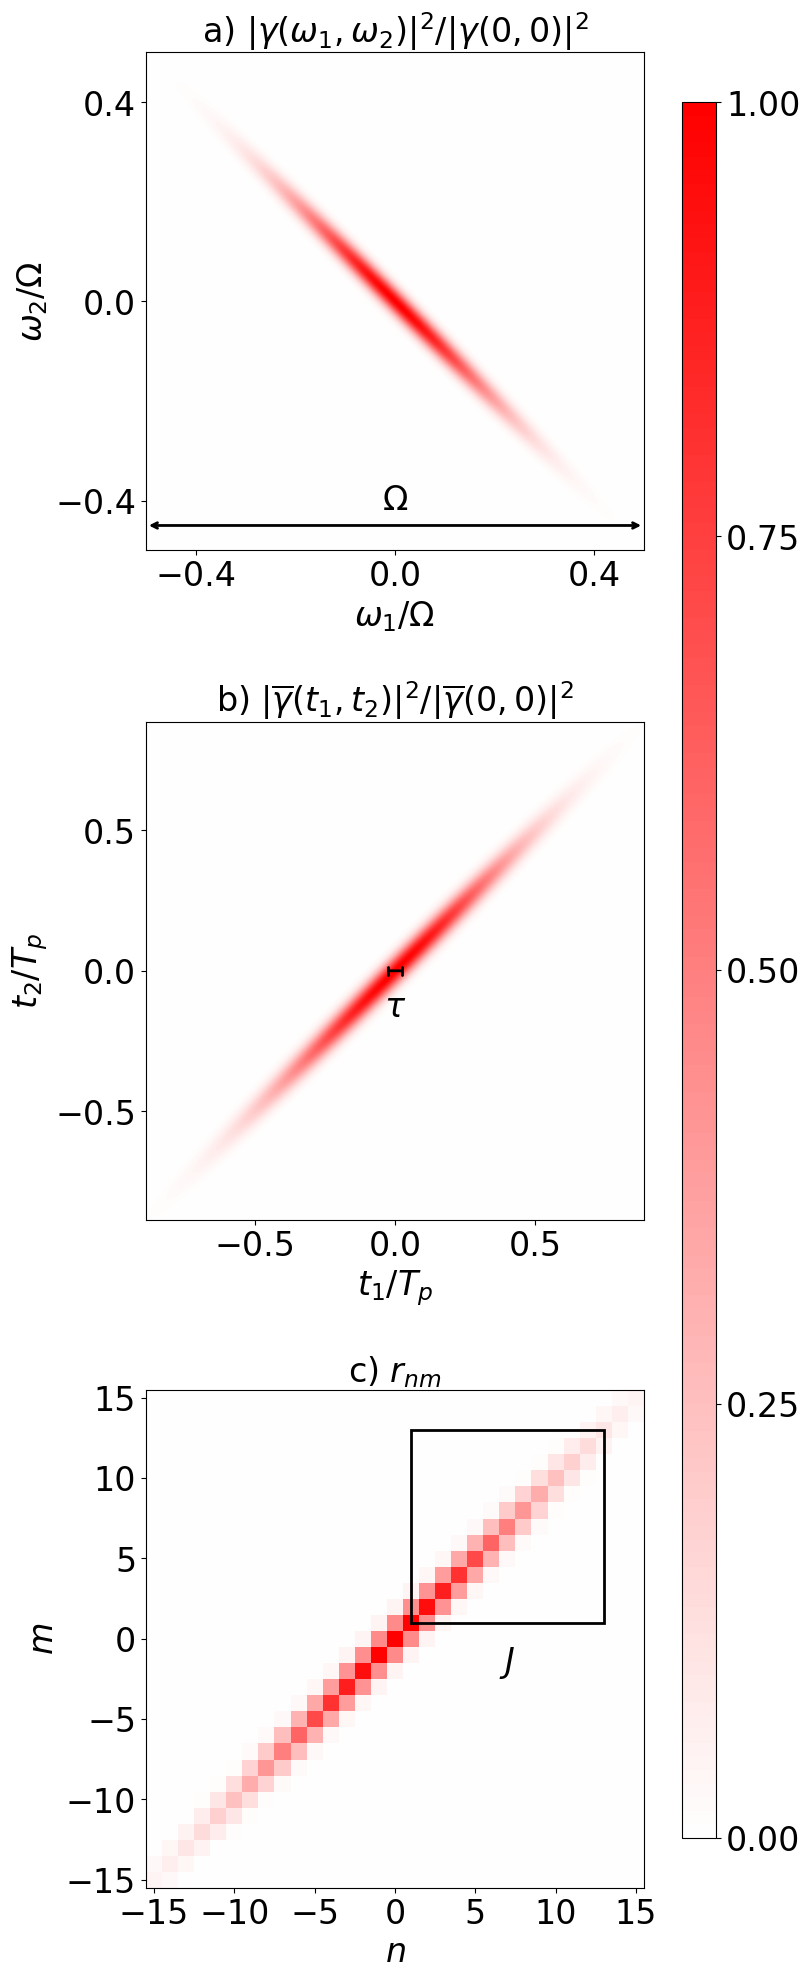

In [7]:
#plots of double gaussian and rnm for paper
fsize=24

#ratio of sigc/sigp
ratio = 15

Tp=1
Tc=Tp/ratio


#double gaussian in frequency
def wdubgauss(w1,w2):
    return np.sqrt(Tc*Tp/(np.pi**2))*np.exp(-((w1-w2)*Tc/(2*np.sqrt(np.pi)))**2)*np.exp(-((w1+w2)*Tp/(2*np.sqrt(np.pi)))**2)

#double gaussian in time
def dubgauss(t1,t2):
    return np.sqrt(1/(Tc*Tp))*np.exp(-(np.sqrt(np.pi)*(t1-t2)/(2*Tc))**2)*np.exp(-(np.sqrt(np.pi)*(t1+t2)/(2*Tp))**2)

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)



# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(3,1, figsize=(8,20), constrained_layout=True)
#fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Define different colormaps and normalization for each subplot
colormap = "bwr"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc

wdim=Omega/2


#discrete values for rnm
num=ratio
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


x = np.linspace(-tdim, tdim, 1000)
y = np.linspace(-tdim, tdim, 1000)
x, y = np.meshgrid(x, y)
zdg = (dubgauss(x, y)/dubgauss(0, 0))**2


# Generate the grid of values
x = np.linspace(-wdim, wdim, 1000)
y = np.linspace(-wdim, wdim, 1000)
x, y = np.meshgrid(x, y)

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/ratio
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = rnm_dg(ns, ms)


# Plot the heatmap


wdim=0.5
im = axs[0].imshow(zwdg, extent=[-wdim, wdim, -wdim, wdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$\omega_1/\Omega$", fontsize=fsize)
axs[0].set_ylabel(r"$\omega_2/\Omega$", fontsize=fsize)
axs[0].tick_params(axis='both', which='major', labelsize=fsize)
axs[0].set_xticks([-0.4,0,0.4])
axs[0].set_yticks([-0.4,0,0.4])
#cbar = fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
axs[0].annotate(
    "", 
    xy=(-0.5, -0.45), 
    xytext=(0.5, -0.45),
    arrowprops=dict(
        arrowstyle="<->",
        color='black',
        lw=2
    )
)

# Optional: Add a label to explain what the arrow is
axs[0].text(0, -0.4, r"$\Omega$", ha='center', va='center', fontsize=fsize)


im = axs[1].imshow(zdg, extent=[-tdim, tdim, -tdim, tdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
axs[1].tick_params(axis='both', which='major', labelsize=fsize)
#axs[0,1].xticks(np.arange(, , step=2))
#cbar = fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
#cbar_ticks = np.linspace(0, 1, num=5)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(cbar_ticks)
#cbar.ax.tick_params(labelsize=fsize)


# axs[1].annotate(
#     "", 
#     xy=(-tau/(2*np.sqrt(2)), tau/(2*np.sqrt(2))), 
#     xytext=(tau/(2*np.sqrt(2)), -tau/(2*np.sqrt(2))),
#     arrowprops=dict(
#         arrowstyle="|-|",
#         color='black',
#         lw=2,
#         mutation_scale=3
#     )
# )

axs[1].annotate(
    "", 
    xy=(-tau/2, 0), 
    xytext=(tau/2, 0),
    arrowprops=dict(
        arrowstyle="|-|",
        color='black',
        lw=2,
        mutation_scale=3
    )
)


# Optional: Add a label to explain what the arrow is
axs[1].text(0, -0.13, r"$\tau$", ha='center', va='center', fontsize=fsize)

from matplotlib.patches import Rectangle

t0=7
T=12
# Create a Rectangle patch
rect = Rectangle((t0-T/2,t0-T/2),T,T,linewidth=2,edgecolor='black',facecolor='none')

# Add the patch to the Axes
axs[2].add_patch(rect)

dim = len(zWSdg)
print(dim)
im = axs[2].imshow(zWSdg, extent=[-dim/2, dim/2, -dim/2, dim/2], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $r_{nm}$", fontsize=fsize)
axs[2].set_xlabel(r"$n$", fontsize=fsize)
axs[2].set_ylabel(r"$m$", fontsize=fsize)
axs[2].set_xticks([-15,-10,-5,0,5,10,15])
axs[2].set_yticks([-15,-10,-5,0,5,10,15])
axs[2].tick_params(axis='both', which='major', labelsize=fsize)
#cbar = fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
axs[2].text(t0, -1.5, r"$J$", ha='center', va='center', fontsize=fsize)


tvals=np.linspace(-ratio, ratio, num=1000)


def window(t,T,t0):
    return np.heaviside(t-t0+T/2,1)-np.heaviside(t-t0-T/2,1)


#for i in range(3):
        #axs[i].yaxis.set_label_coords(-0.2, 0.5)


cbar = fig.colorbar(im, ax=axs[:], aspect=50, shrink=0.9, location="right")
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=fsize)

# Adjust layout to make sure subplots fit well
#plt.tight_layout()

plt.savefig("DGfig_Vert.pdf", bbox_inches='tight')

# Show the plot
plt.show()

31


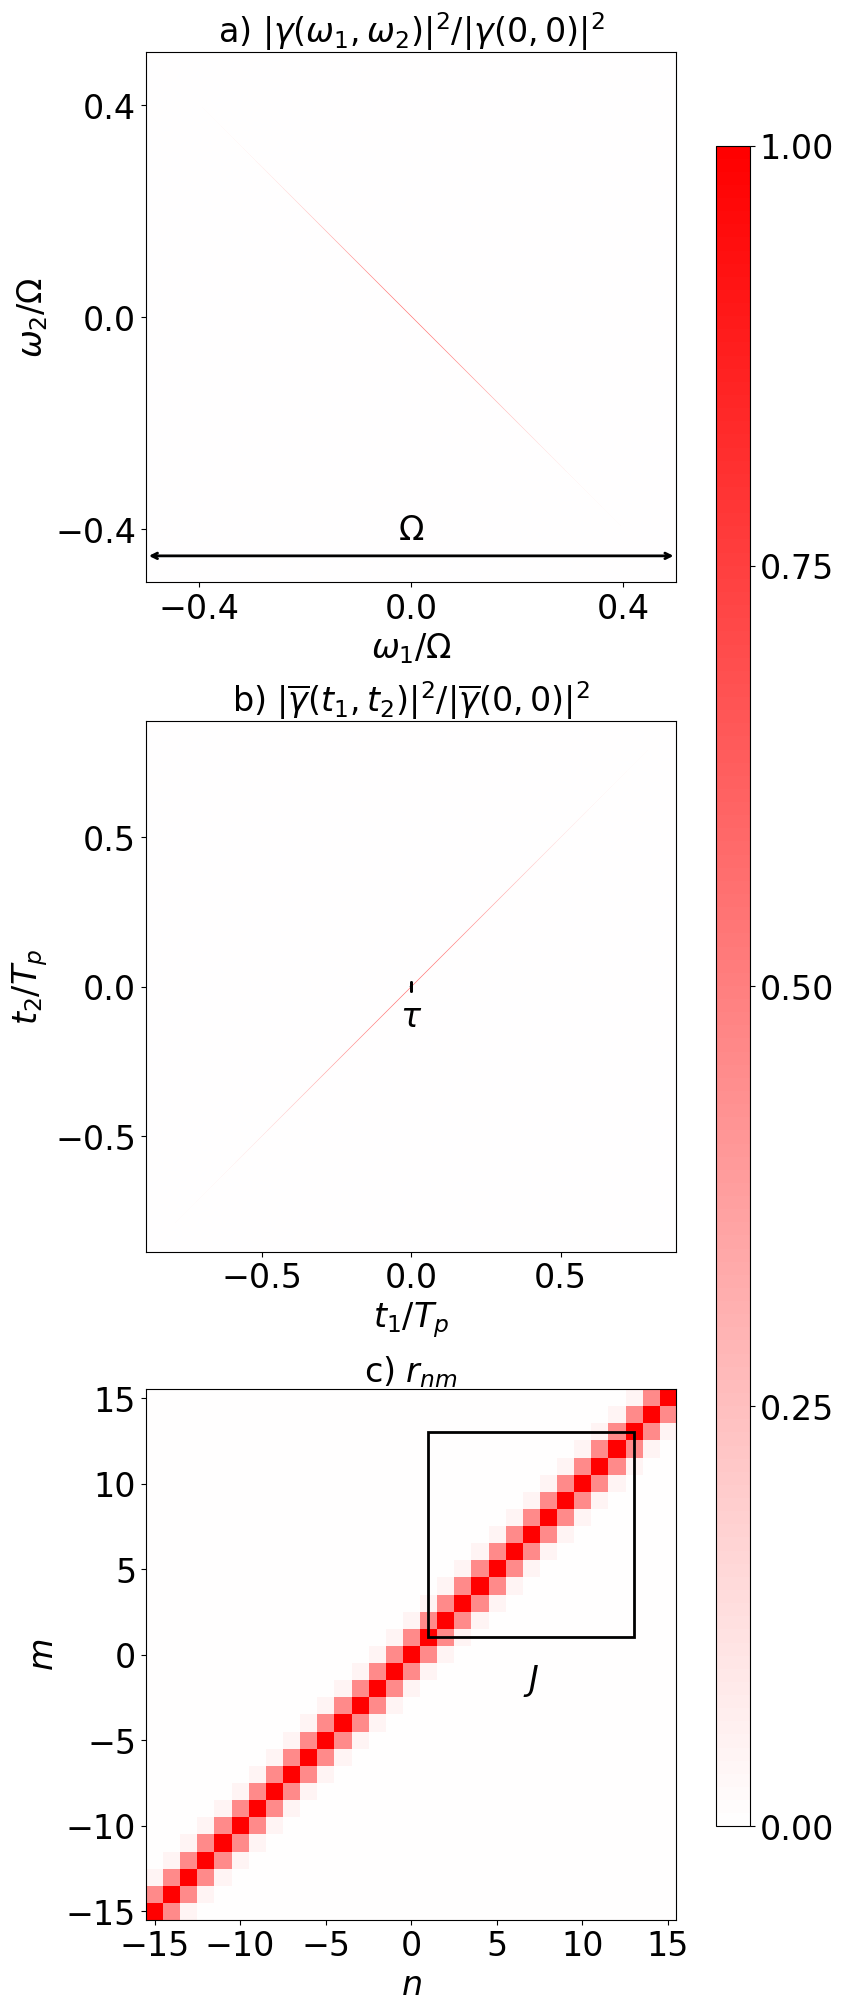

In [12]:
#plots of double gaussian and rnm for paper
fsize=24

#ratio of sigc/sigp
ratio = 15

Tp=1
Tc=Tp/ratio


#double gaussian in frequency
def wdubgauss(w1,w2):
    return np.sqrt(Tc*Tp/(np.pi**2))*np.exp(-((w1-w2)*Tc/(2*np.sqrt(np.pi)))**2)*np.exp(-((w1+w2)*Tp/(2*np.sqrt(np.pi)))**2)

#double gaussian in time
def dubgauss(t1,t2):
    return np.sqrt(1/(Tc*Tp))*np.exp(-(np.sqrt(np.pi)*(t1-t2)/(2*Tc))**2)*np.exp(-(np.sqrt(np.pi)*(t1+t2)/(2*Tp))**2)

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)



# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(3,1, figsize=(8,20), constrained_layout=True)
#fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Define different colormaps and normalization for each subplot
colormap = "bwr"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc

wdim=Omega/2


#discrete values for rnm
num=15
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


x = np.linspace(-tdim, tdim, 1000)
y = np.linspace(-tdim, tdim, 1000)
x, y = np.meshgrid(x, y)
zdg = (dubgauss(x, y)/dubgauss(0, 0))**2


# Generate the grid of values
x = np.linspace(-wdim, wdim, 1000)
y = np.linspace(-wdim, wdim, 1000)
x, y = np.meshgrid(x, y)

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/ratio
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = rnm_dg(ns, ms)


# Plot the heatmap


wdim=0.5
im = axs[0].imshow(zwdg, extent=[-wdim, wdim, -wdim, wdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$\omega_1/\Omega$", fontsize=fsize)
axs[0].set_ylabel(r"$\omega_2/\Omega$", fontsize=fsize)
axs[0].tick_params(axis='both', which='major', labelsize=fsize)
axs[0].set_xticks([-0.4,0,0.4])
axs[0].set_yticks([-0.4,0,0.4])
#cbar = fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
axs[0].annotate(
    "", 
    xy=(-0.5, -0.45), 
    xytext=(0.5, -0.45),
    arrowprops=dict(
        arrowstyle="<->",
        color='black',
        lw=2
    )
)

# Optional: Add a label to explain what the arrow is
axs[0].text(0, -0.4, r"$\Omega$", ha='center', va='center', fontsize=fsize)


im = axs[1].imshow(zdg, extent=[-tdim, tdim, -tdim, tdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
axs[1].tick_params(axis='both', which='major', labelsize=fsize)
#axs[0,1].xticks(np.arange(, , step=2))
#cbar = fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
#cbar_ticks = np.linspace(0, 1, num=5)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(cbar_ticks)
#cbar.ax.tick_params(labelsize=fsize)

graphtau = Tc
axs[1].annotate(
    "", 
    xy=(-graphtau/2, 0), 
    xytext=(graphtau/2, 0),
    arrowprops=dict(
        arrowstyle="|-|",
        color='black',
        lw=2,
        mutation_scale=3
    )
)


# Optional: Add a label to explain what the arrow is
axs[1].text(0, -0.1, r"$\tau$", ha='center', va='center', fontsize=fsize)

from matplotlib.patches import Rectangle

t0=7
T=12
# Create a Rectangle patch
rect = Rectangle((t0-T/2,t0-T/2),T,T,linewidth=2,edgecolor='black',facecolor='none')

# Add the patch to the Axes
axs[2].add_patch(rect)

dim = len(zWSdg)
print(dim)
im = axs[2].imshow(zWSdg, extent=[-dim/2, dim/2, -dim/2, dim/2], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $r_{nm}$", fontsize=fsize)
axs[2].set_xlabel(r"$n$", fontsize=fsize)
axs[2].set_ylabel(r"$m$", fontsize=fsize)
axs[2].set_xticks([-15,-10,-5,0,5,10,15])
axs[2].set_yticks([-15,-10,-5,0,5,10,15])
axs[2].tick_params(axis='both', which='major', labelsize=fsize)
#cbar = fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
axs[2].text(t0, -1.5, r"$J$", ha='center', va='center', fontsize=fsize)


tvals=np.linspace(-ratio, ratio, num=1000)


def window(t,T,t0):
    return np.heaviside(t-t0+T/2,1)-np.heaviside(t-t0-T/2,1)


#for i in range(3):
        #axs[i].yaxis.set_label_coords(-0.2, 0.5)


cbar = fig.colorbar(im, ax=axs[:], aspect=50, shrink=0.9, location="right")
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=fsize)

# Adjust layout to make sure subplots fit well
#plt.tight_layout()

#plt.savefig("DGfig_Vert.pdf", bbox_inches='tight')

# Show the plot
plt.show()

31


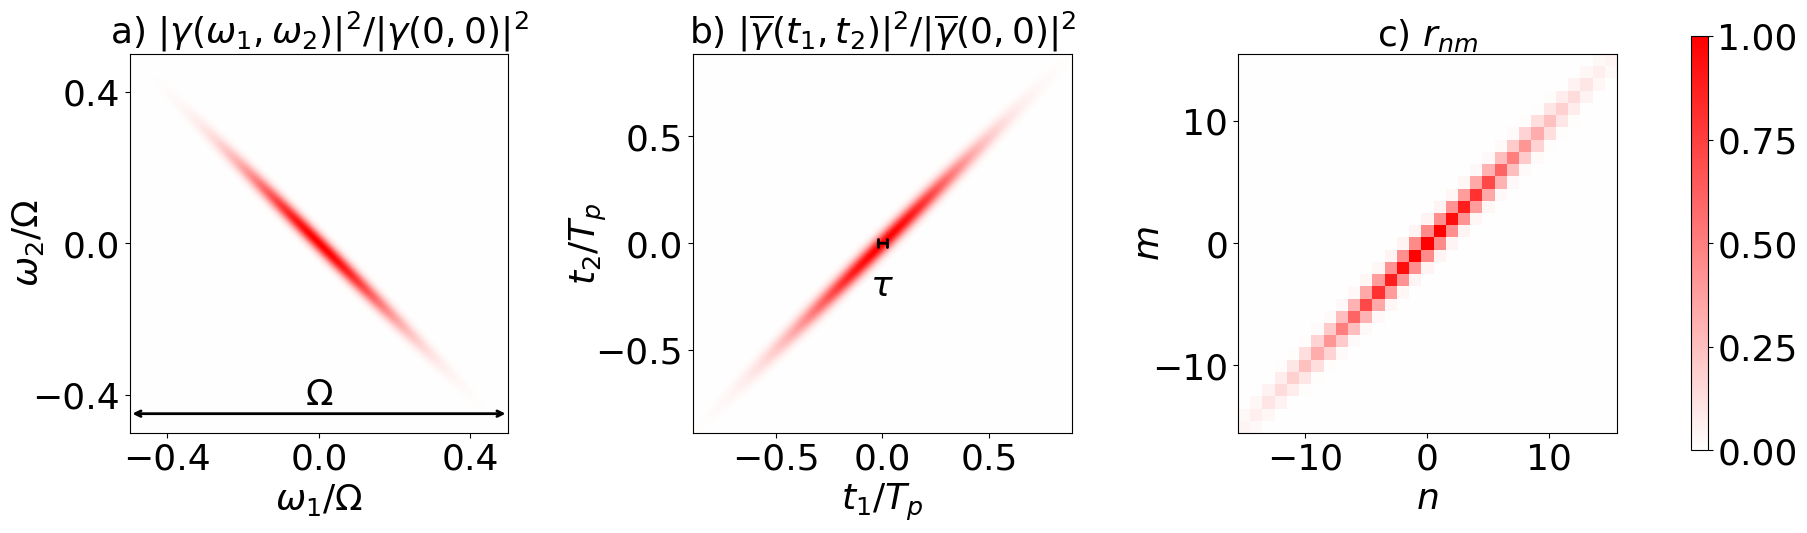

In [15]:
import matplotlib.gridspec as gridspec
#plots of double gaussian and rnm for thesis proposal (Horizontal)
fsize=26
y_label_pad = -10

#ratio of sigc/sigp
ratio = 15

Tp=1
Tc=Tp/ratio


#double gaussian in frequency
def wdubgauss(w1,w2):
    return np.sqrt(Tc*Tp/(np.pi**2))*np.exp(-((w1-w2)*Tc/(2*np.sqrt(np.pi)))**2)*np.exp(-((w1+w2)*Tp/(2*np.sqrt(np.pi)))**2)

#double gaussian in time
def dubgauss(t1,t2):
    return np.sqrt(1/(Tc*Tp))*np.exp(-(np.sqrt(np.pi)*(t1-t2)/(2*Tc))**2)*np.exp(-(np.sqrt(np.pi)*(t1+t2)/(2*Tp))**2)

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)



# Create subplots (1 row, 3 columns)
#fig, axs = plt.subplot(1,3, figsize=(20,8), constrained_layout=False)
fig, axs = plt.subplots(1,3, figsize=(18, 6), 
                        gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0.1}, constrained_layout=True)

#fig.subplots_adjust(wspace=0.7, hspace=1.4)

# Define different colormaps and normalization for each subplot
colormap = "bwr"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc

wdim=Omega/2


#discrete values for rnm
num=ratio
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


x = np.linspace(-tdim, tdim, 1000)
y = np.linspace(-tdim, tdim, 1000)
x, y = np.meshgrid(x, y)
zdg = (dubgauss(x, y)/dubgauss(0, 0))**2


# Generate the grid of values
x = np.linspace(-wdim, wdim, 1000)
y = np.linspace(-wdim, wdim, 1000)
x, y = np.meshgrid(x, y)

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/ratio
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = rnm_dg(ns, ms)


# Plot the heatmap


wdim=0.5
im = axs[0].imshow(zwdg, extent=[-wdim, wdim, -wdim, wdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$\omega_1/\Omega$", fontsize=fsize)
axs[0].set_ylabel(r"$\omega_2/\Omega$", fontsize=fsize, labelpad=y_label_pad)
axs[0].tick_params(axis='both', which='major', labelsize=fsize)
axs[0].set_xticks([-0.4,0,0.4])
axs[0].set_yticks([-0.4,0,0.4])
#cbar = fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
axs[0].annotate(
    "", 
    xy=(-0.5, -0.45), 
    xytext=(0.5, -0.45),
    arrowprops=dict(
        arrowstyle="<->",
        color='black',
        lw=2
    )
)

# Optional: Add a label to explain what the arrow is
axs[0].text(0, -0.4, r"$\Omega$", ha='center', va='center', fontsize=fsize)


im = axs[1].imshow(zdg, extent=[-tdim, tdim, -tdim, tdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1].set_ylabel(r"$t_2/T_p$", fontsize=fsize, labelpad=y_label_pad)
axs[1].tick_params(axis='both', which='major', labelsize=fsize)
#axs[0,1].xticks(np.arange(, , step=2))
#cbar = fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
#cbar_ticks = np.linspace(0, 1, num=5)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(cbar_ticks)
#cbar.ax.tick_params(labelsize=fsize)

graphtau = Tc
axs[1].annotate(
    "", 
    xy=(-graphtau/2, 0), 
    xytext=(graphtau/2, 0),
    arrowprops=dict(
        arrowstyle="|-|",
        color='black',
        lw=2,
        mutation_scale=3
    )
)


# Optional: Add a label to explain what the arrow is
axs[1].text(0, -0.2, r"$\tau$", ha='center', va='center', fontsize=fsize)

from matplotlib.patches import Rectangle

t0=7
T=12
# Create a Rectangle patch
#rect = Rectangle((t0-T/2,t0-T/2),T,T,linewidth=2,edgecolor='black',facecolor='none')

# Add the patch to the Axes
#axs[2].add_patch(rect)

dim = len(zWSdg)
print(dim)
im = axs[2].imshow(zWSdg, extent=[-dim/2, dim/2, -dim/2, dim/2], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $r_{nm}$", fontsize=fsize)
axs[2].set_xlabel(r"$n$", fontsize=fsize)
axs[2].set_ylabel(r"$m$", fontsize=fsize, labelpad=y_label_pad)
axs[2].set_xticks([-10,0,10])
axs[2].set_yticks([-10,0,10])
axs[2].tick_params(axis='both', which='major', labelsize=fsize)
#cbar = fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
#axs[2].text(t0, -1.5, r"$J$", ha='center', va='center', fontsize=fsize)


tvals=np.linspace(-ratio, ratio, num=1000)


def window(t,T,t0):
    return np.heaviside(t-t0+T/2,1)-np.heaviside(t-t0-T/2,1)


#for i in range(3):
        #axs[i].yaxis.set_label_coords(-0.2, 0.5)


cbar = fig.colorbar(im, ax=axs[:], aspect=25, shrink=0.7, location="right")
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=fsize)

# Adjust layout to make sure subplots fit well
#plt.tight_layout(pad=3.0)

plt.savefig("DGfig_Horizont.pdf", bbox_inches='tight')

# Show the plot
plt.show()

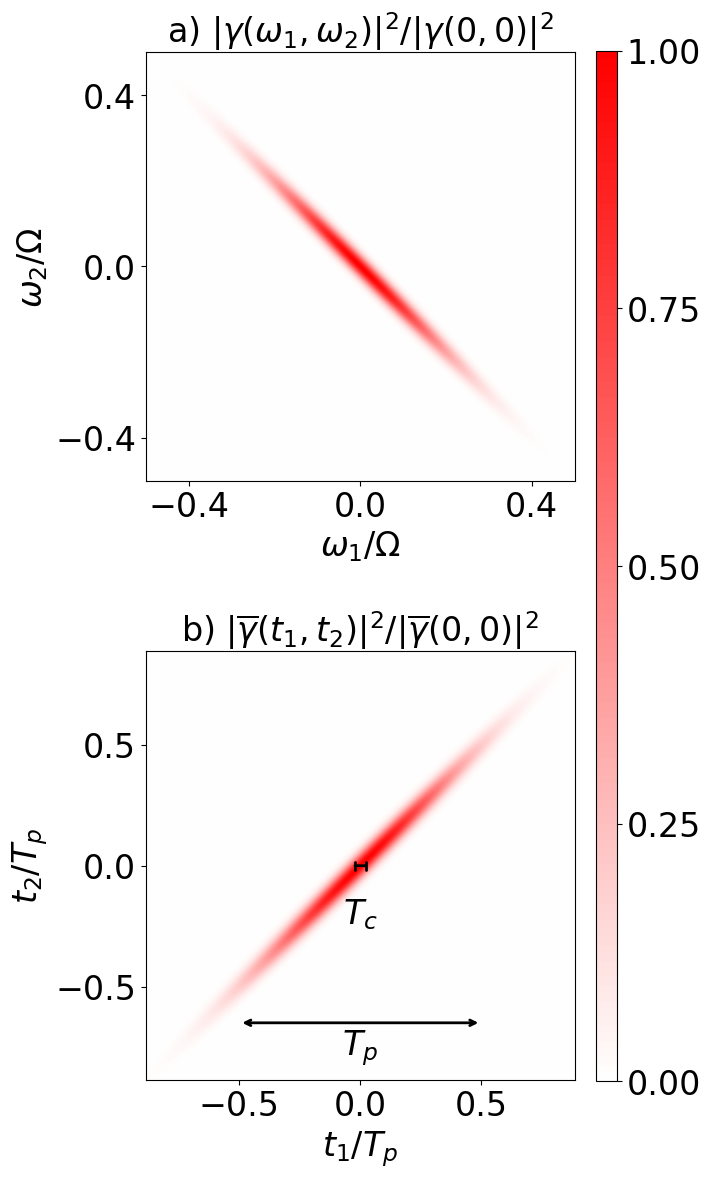

In [25]:
#plots of double gaussian fopr slides
fsize=24

#ratio of sigc/sigp
ratio = 15

Tp=1
Tc=Tp/ratio


#double gaussian in frequency
def wdubgauss(w1,w2):
    return np.sqrt(Tc*Tp/(np.pi**2))*np.exp(-((w1-w2)*Tc/(2*np.sqrt(np.pi)))**2)*np.exp(-((w1+w2)*Tp/(2*np.sqrt(np.pi)))**2)

#double gaussian in time
def dubgauss(t1,t2):
    return np.sqrt(1/(Tc*Tp))*np.exp(-(np.sqrt(np.pi)*(t1-t2)/(2*Tc))**2)*np.exp(-(np.sqrt(np.pi)*(t1+t2)/(2*Tp))**2)

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)




fig, axs = plt.subplots(2,1, figsize=(7,12), constrained_layout=True)
#fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Define different colormaps and normalization for each subplot
colormap = "bwr"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc

wdim=Omega/2


#discrete values for rnm
num=ratio
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


x = np.linspace(-tdim, tdim, 1000)
y = np.linspace(-tdim, tdim, 1000)
x, y = np.meshgrid(x, y)
zdg = (dubgauss(x, y)/dubgauss(0, 0))**2


# Generate the grid of values
x = np.linspace(-wdim, wdim, 1000)
y = np.linspace(-wdim, wdim, 1000)
x, y = np.meshgrid(x, y)

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/ratio
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = rnm_dg(ns, ms)


# Plot the heatmap


wdim=0.5
im = axs[0].imshow(zwdg, extent=[-wdim, wdim, -wdim, wdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $|\gamma(\omega_1,\omega_2)|^2/|\gamma(0,0)|^2$", fontsize=fsize)
axs[0].set_xlabel(r"$\omega_1/\Omega$", fontsize=fsize)
axs[0].set_ylabel(r"$\omega_2/\Omega$", fontsize=fsize)
axs[0].tick_params(axis='both', which='major', labelsize=fsize)
axs[0].set_xticks([-0.4,0,0.4])
axs[0].set_yticks([-0.4,0,0.4])
#cbar = fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
'''
axs[0].annotate(
    "", 
    xy=(-0.5, -0.45), 
    xytext=(0.5, -0.45),
    arrowprops=dict(
        arrowstyle="<->",
        color='black',
        lw=2
    )
)
'''

# Optional: Add a label to explain what the arrow is
#axs[0].text(0, -0.4, r"$\Omega$", ha='center', va='center', fontsize=fsize)


im = axs[1].imshow(zdg, extent=[-tdim, tdim, -tdim, tdim], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $|\overline{\gamma}(t_1,t_2)|^2/|\overline{\gamma}(0,0)|^2$", fontsize=fsize)
axs[1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
axs[1].tick_params(axis='both', which='major', labelsize=fsize)
#axs[0,1].xticks(np.arange(, , step=2))
#cbar = fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
#cbar_ticks = np.linspace(0, 1, num=5)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(cbar_ticks)
#cbar.ax.tick_params(labelsize=fsize)
axs[1].annotate(
    "", 
    xy=(-0.5, -0.65), 
    xytext=(0.5, -0.65),
    arrowprops=dict(
        arrowstyle="<->",
        color='black',
        lw=2
    )
)

graphtau = Tc
axs[1].annotate(
    "", 
    xy=(-graphtau/2, 0), 
    xytext=(graphtau/2, 0),
    arrowprops=dict(
        arrowstyle="|-|",
        color='black',
        lw=2,
        mutation_scale=3
    )
)


# Optional: Add a label to explain what the arrow is
axs[1].text(0, -0.2, r"$T_c$", ha='center', va='center', fontsize=fsize)
axs[1].text(0, -0.75, r"$T_p$", ha='center', va='center', fontsize=fsize)

from matplotlib.patches import Rectangle

t0=7
T=12
# Create a Rectangle patch
rect = Rectangle((t0-T/2,t0-T/2),T,T,linewidth=2,edgecolor='black',facecolor='none')


'''
# Add the patch to the Axes
axs[2].add_patch(rect)

dim = len(zWSdg)
print(dim)
im = axs[2].imshow(zWSdg, extent=[-dim/2, dim/2, -dim/2, dim/2], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $r_{nm}$", fontsize=fsize)
axs[2].set_xlabel(r"$n$", fontsize=fsize)
axs[2].set_ylabel(r"$m$", fontsize=fsize)
axs[2].set_xticks([-15,-10,-5,0,5,10,15])
axs[2].set_yticks([-15,-10,-5,0,5,10,15])
axs[2].tick_params(axis='both', which='major', labelsize=fsize)
#cbar = fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)
axs[2].text(t0, -1.5, r"$J$", ha='center', va='center', fontsize=fsize)
'''


tvals=np.linspace(-ratio, ratio, num=1000)


def window(t,T,t0):
    return np.heaviside(t-t0+T/2,1)-np.heaviside(t-t0-T/2,1)


#for i in range(3):
        #axs[i].yaxis.set_label_coords(-0.2, 0.5)


cbar = fig.colorbar(im, ax=axs[:], aspect=50, shrink=0.9, location="right")
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=fsize)

# Adjust layout to make sure subplots fit well
#plt.tight_layout()

plt.savefig("DGfig_no_r.pdf", bbox_inches='tight')

# Show the plot
plt.show()

31


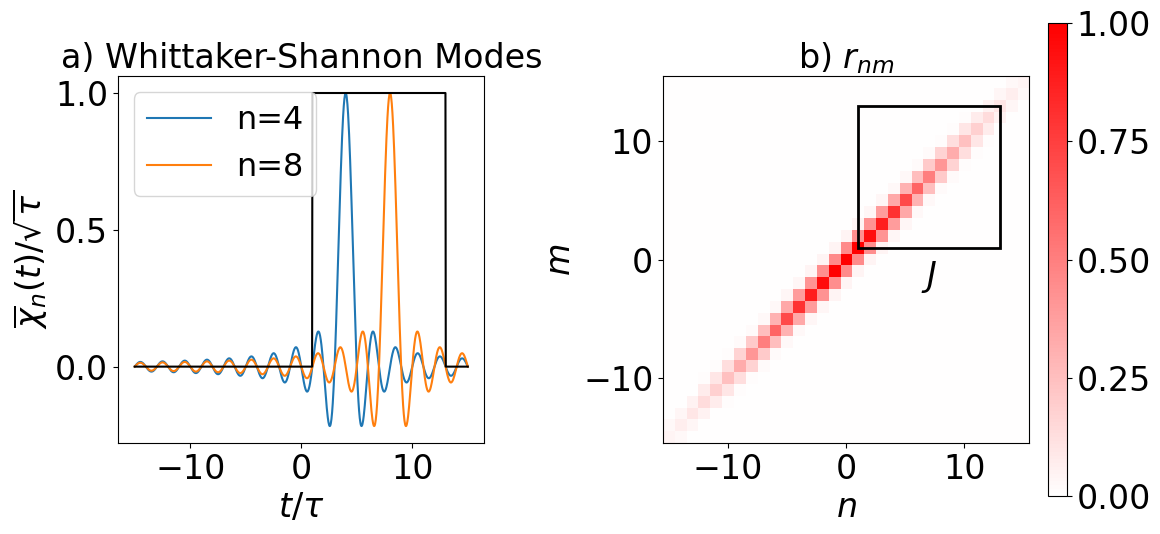

In [24]:
#plots of double gaussian and rnm for poster
fsize=24

#ratio of sigc/sigp
ratio = 15

Tp=1
Tc=Tp/ratio


#double gaussian in frequency
def wdubgauss(w1,w2):
    return np.sqrt(Tc*Tp/(np.pi**2))*np.exp(-((w1-w2)*Tc/(2*np.sqrt(np.pi)))**2)*np.exp(-((w1+w2)*Tp/(2*np.sqrt(np.pi)))**2)

#double gaussian in time
def dubgauss(t1,t2):
    return np.sqrt(1/(Tc*Tp))*np.exp(-(np.sqrt(np.pi)*(t1-t2)/(2*Tc))**2)*np.exp(-(np.sqrt(np.pi)*(t1+t2)/(2*Tp))**2)

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)



# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1}, constrained_layout=True)
#fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Define different colormaps and normalization for each subplot
colormap = "bwr"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc

wdim=Omega/2


#discrete values for rnm
num=ratio
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)


x = np.linspace(-tdim, tdim, 1000)
y = np.linspace(-tdim, tdim, 1000)
x, y = np.meshgrid(x, y)
zdg = (dubgauss(x, y)/dubgauss(0, 0))**2


# Generate the grid of values
x = np.linspace(-wdim, wdim, 1000)
y = np.linspace(-wdim, wdim, 1000)
x, y = np.meshgrid(x, y)

sigc=1/(2*np.sqrt(np.pi))
sigp=sigc/ratio
zwdg = (wdubgauss(x, y)/wdubgauss(0, 0))**2

zWSdg = rnm_dg(ns, ms)


# Plot the heatmap




from matplotlib.patches import Rectangle

t0=7
T=12
# Create a Rectangle patch
rect = Rectangle((t0-T/2,t0-T/2),T,T,linewidth=2,edgecolor='black',facecolor='none')

# Add the patch to the Axes
axs[1].add_patch(rect)

dim = len(zWSdg)
print(dim)
im = axs[1].imshow(zWSdg, extent=[-dim/2, dim/2, -dim/2, dim/2], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $r_{nm}$", fontsize=fsize)
axs[1].set_xlabel(r"$n$", fontsize=fsize)
axs[1].set_ylabel(r"$m$", fontsize=fsize)
axs[1].tick_params(axis='both', which='major', labelsize=fsize)
#cbar = fig.colorbar(im, ax=axs[1,0], fraction=0.046, pad=0.04)
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
axs[1].text(t0, -1.5, r"$J$", ha='center', va='center', fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1], aspect=25, shrink=0.8)
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=fsize)


tvals=np.linspace(-ratio, ratio, num=1000)


def window(t,T,t0):
    return np.heaviside(t-t0+T/2,1)-np.heaviside(t-t0-T/2,1)


n1=4
n2=8
#for n in np.arange(-20,21):
 #   axs.plot(tvals, chi(n,tvals,1), color="black", alpha=0.6)
axs[0].plot(tvals,chi(n1,tvals,1), label="n="+str(n1))
axs[0].plot(tvals,chi(n2,tvals,1), label="n="+str(n2))
axs[0].plot(tvals, window(tvals,T,t0), color="black")
#axs[1,1].plot(tvals, window(tvals,20,10), color="black", label="Window\n"+r"$T=20\tau$")
axs[0].set_xlabel(r'$t/\tau$', fontsize=fsize)
axs[0].set_ylabel(r"$\overline{\chi}_n(t)/\sqrt{\tau}$", fontsize=fsize)
axs[0].legend(fontsize=fsize-1, loc="upper left")
axs[0].set_title("a) Whittaker-Shannon Modes", fontsize=fsize)
axs[0].tick_params(axis='both', which='major', labelsize=fsize)
axs[0].set_box_aspect(1)
#dummy_cb = fig.colorbar(im, ax=axs[1,1])
#dummy_cb.remove()


#for i in range(2):
       # axs[i].yaxis.set_label_coords(-0.2, 0.5)

'''
cbar = fig.colorbar(im, ax=axs[:], location='right', aspect=25, shrink=0.4)
cbar.ax.set_ylim(0,1)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=fsize)
'''

# Adjust layout to make sure subplots fit well
#plt.tight_layout()

plt.savefig("Localization_Fig.pdf")

# Show the plot
plt.show()

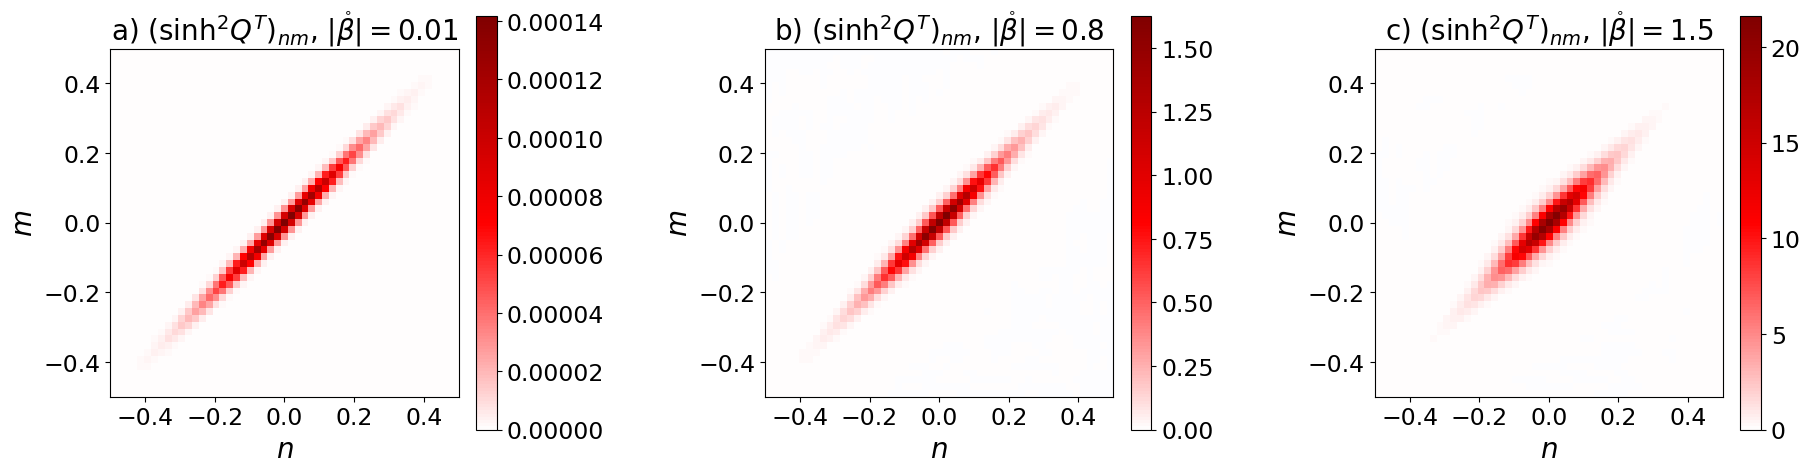

In [59]:
import matplotlib.gridspec as gridspec
#plots of double gaussian and rnm for thesis proposal (Horizontal)
fsize=20
y_label_pad = -10

#ratio of sigc/sigp
ratio = 25

Tp=1
Tc=Tp/ratio

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)


# Create subplots (1 row, 3 columns)
#fig, axs = plt.subplot(1,3, figsize=(20,8), constrained_layout=False)
fig, axs = plt.subplots(1,3, figsize=(18, 6), 
                        gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0.1}, constrained_layout=True)

#fig.subplots_adjust(wspace=0.7, hspace=1.4)

# Define different colormaps and normalization for each subplot
colormap = "seismic"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc


#discrete values for rnm
num=ratio
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)

r = rnm_dg(ns, ms)


# Plot the heatmap


betac=0.01

B=betac*r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(sinhQ2))


# Plot the heatmap
im = axs[0].imshow(sinhQ2, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0].set(aspect='equal')
axs[0].set_title(r"a) $(\sinh^2Q^T)_{nm}$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0].set_xlabel(r"$n$", fontsize=fsize)
axs[0].set_ylabel(r"$m$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0], shrink=0.7)
cbar.ax.set_ylim(0,np.max(sinhQ2))


betac=0.8

B=betac*r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(sinhQ2))


# Plot the heatmap
im = axs[1].imshow(sinhQ2, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1].set(aspect='equal')
axs[1].set_title(r"b) $(\sinh^2Q^T)_{nm}$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1].set_xlabel(r"$n$", fontsize=fsize)
axs[1].set_ylabel(r"$m$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1], shrink=0.7)
cbar.ax.set_ylim(0,np.max(sinhQ2))


betac=1.5

B=betac*r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(sinhQ2))


# Plot the heatmap
im = axs[2].imshow(sinhQ2, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[2].set(aspect='equal')
axs[2].set_title(r"c) $(\sinh^2Q^T)_{nm}$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[2].set_xlabel(r"$n$", fontsize=fsize)
axs[2].set_ylabel(r"$m$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[2], shrink=0.7)
cbar.ax.set_ylim(0,np.max(sinhQ2))


#cbar = fig.colorbar(im, ax=axs[:], aspect=25, shrink=0.7, location="right")
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)

# Adjust layout to make sure subplots fit well
#plt.tight_layout(pad=3.0)
for i in range(3):
    axs[i].set_xticks([-0.4,-0.2,0,0.2,0.4])

plt.savefig("sinh2Q_Fig.pdf", bbox_inches='tight')

# Show the plot
plt.show()

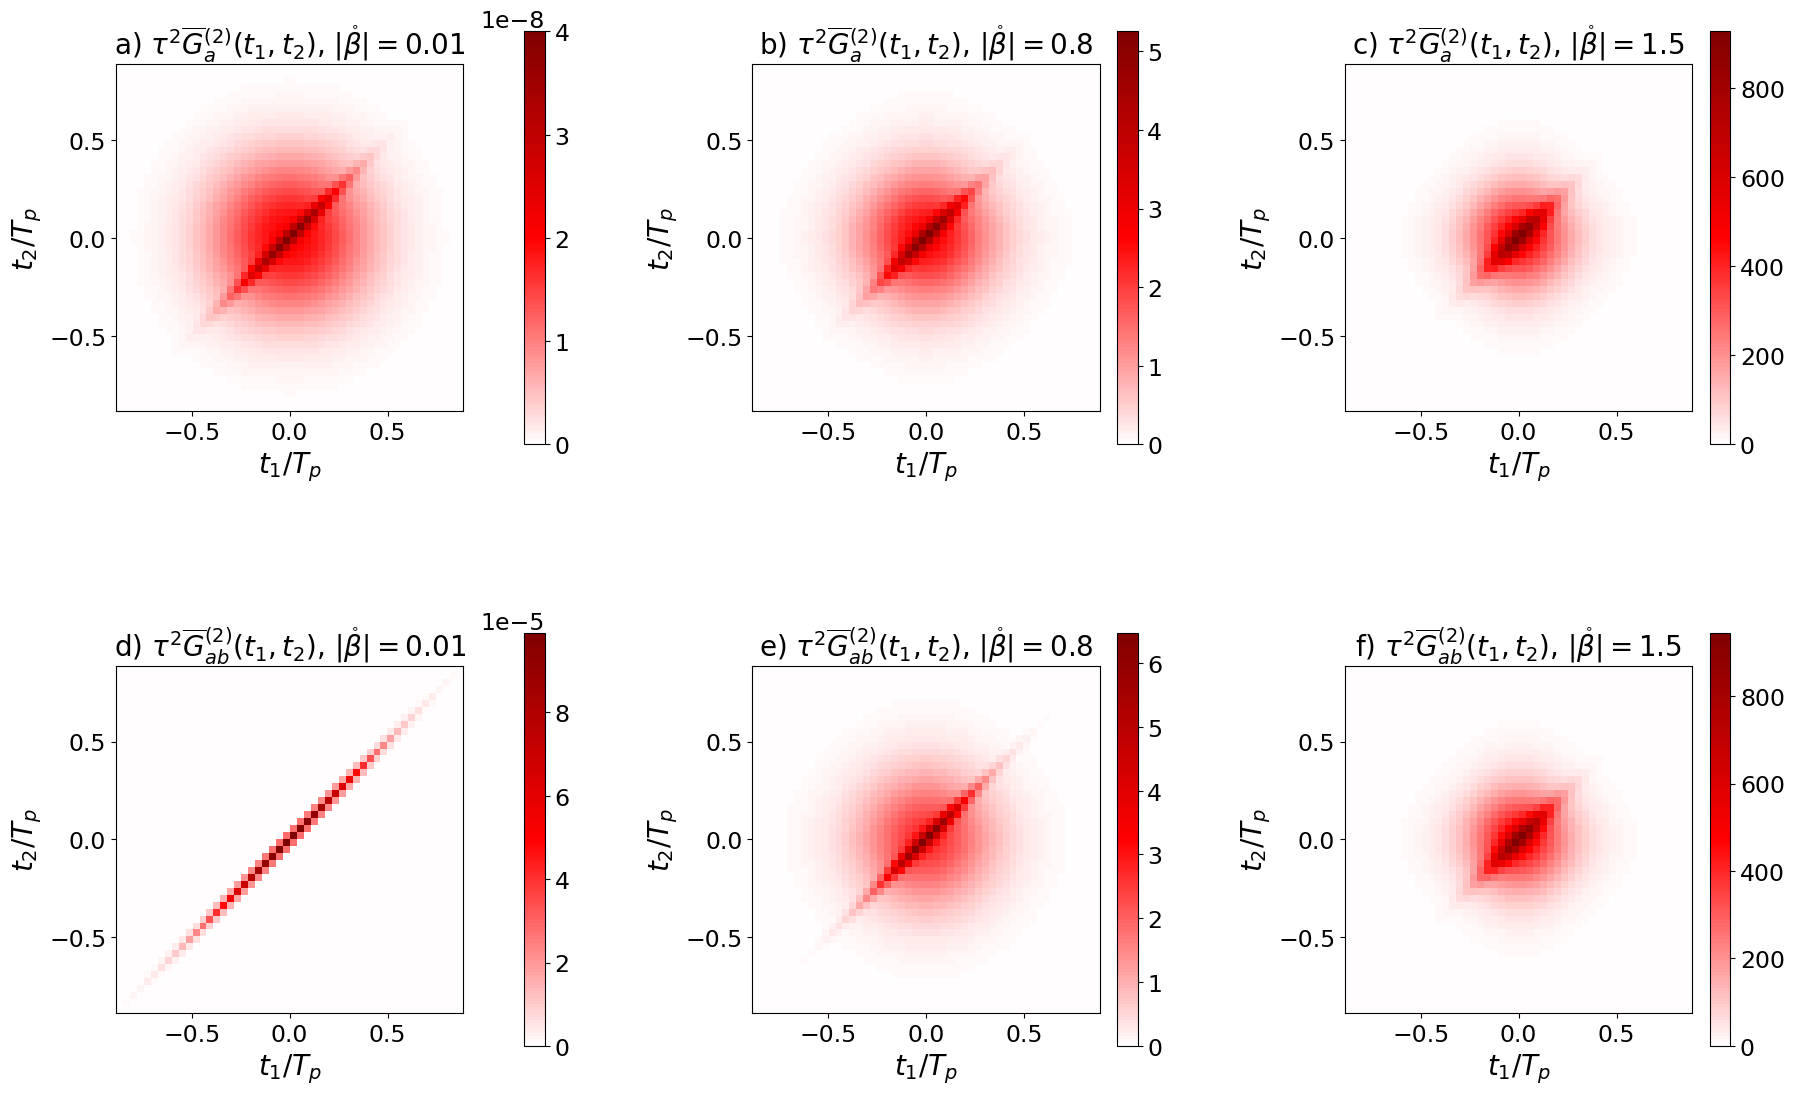

In [53]:
import matplotlib.gridspec as gridspec
#plots of double gaussian and rnm for thesis proposal (Horizontal
fsize=20
y_label_pad = -10

#G functions defined with matrix multiplication, and normalized by tau
def Ga(t1,t2):
    return np.dot(chivec(t1),np.matmul(sinhQ2,np.transpose(chivec(t2))))

def Gab(t1,t2):
    return np.dot(chivec(t1),np.matmul(SCU,np.transpose(chivec(t2))))

def G2a(t1,t2):
    return ( (Ga(t1,t2))**2+Ga(t1,t1)*Ga(t2,t2) ) * (tau**2)

def G2ab(t1,t2):
    return ( (Gab(t1,t2))**2+Ga(t1,t1)*Ga(t2,t2) ) * (tau**2)

#ratio of sigc/sigp
ratio = 25

Tp=1
Tc=Tp/ratio

#rnm matrix of double gaussian
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)


# Create subplots (1 row, 3 columns)
#fig, axs = plt.subplot(1,3, figsize=(20,8), constrained_layout=False)
fig, axs = plt.subplots(2,3, figsize=(18, 12), 
                        gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0.1}, constrained_layout=True)

#fig.subplots_adjust(wspace=0.7, hspace=1.4)

# Define different colormaps and normalization for each subplot
colormap = "seismic"
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=1)

# Define custom ticks and labels for the colorbar
ticks = [0, 0.25, 0.5, 0.75, 1]
tick_labels = ['Low', 'Mid-Low', 'Zero', 'Mid-High', 'High']

# Loop through each subplot and create a heatmap

tdim=0.5*np.sqrt(np.pi)

Omega=2*np.pi/Tc
tau=Tc

tdim=0.5*np.sqrt(np.pi)

trange = [-tdim, tdim, -tdim, tdim]


#discrete values for rnm
num=ratio
nvals=range(-num,num+1)
mvals=range(-num,num+1)
ns, ms = np.meshgrid(nvals, mvals)

r = rnm_dg(ns, ms)


# Plot the heatmap


# Generate the grid of values
xvals = np.linspace(-tdim, tdim, 50)
yvals = np.linspace(-tdim, tdim, 50)

betac=0.01
B=betac*r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2a(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,0].imshow(data, extent=trange, origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,0].set(aspect='equal')
axs[0,0].set_title(r"a) $\tau^2\overline{G}^{(2)}_a(t_1,t_2)$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,0], shrink=0.7)
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2ab(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,0].imshow(data, extent=trange, origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,0].set(aspect='equal')
axs[1,0].set_title(r"d) $\tau^2\overline{G}^{(2)}_{ab}(t_1,t_2)$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,0].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,0].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,0], shrink=0.7)
cbar.ax.set_ylim(0,np.max(data))



betac=0.8
B=betac*r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2a(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,1].imshow(data, extent=trange, origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,1].set(aspect='equal')
axs[0,1].set_title(r"b) $\tau^2\overline{G}^{(2)}_a(t_1,t_2)$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,1], shrink=0.7)
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2ab(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,1].imshow(data, extent=trange, origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,1].set(aspect='equal')
axs[1,1].set_title(r"e) $\tau^2\overline{G}^{(2)}_{ab}(t_1,t_2)$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,1].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,1].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,1], shrink=0.7)
cbar.ax.set_ylim(0,np.max(data))


betac=1.5
B=betac*r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ=sinh(Q)
sinhQ2=np.matmul(sinhQ,sinhQ)
coshQ=cosh(Q)
SCU=np.matmul(np.matmul(sinhQ,coshQ),U)
data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2a(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[0,2].imshow(data, extent=trange, origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[0,2].set(aspect='equal')
axs[0,2].set_title(r"c) $\tau^2\overline{G}^{(2)}_a(t_1,t_2)$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[0,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[0,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[0,2], shrink=0.7)
cbar.ax.set_ylim(0,1)
cbar.ax.set_ylim(0,np.max(data))

data=[]
for i in xvals:
    row=[]
    for j in yvals:
        row.append(G2ab(i,j))
    data.append(row)
norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=np.max(data))

# Plot the heatmap
im = axs[1,2].imshow(data, extent=trange, origin='lower', cmap=colormap, norm=norm, aspect='auto')
axs[1,2].set(aspect='equal')
axs[1,2].set_title(r"f) $\tau^2\overline{G}^{(2)}_{ab}(t_1,t_2)$, $|\mathring{\beta}|=$"+str(betac), fontsize=fsize)
axs[1,2].set_xlabel(r"$t_1/T_p$", fontsize=fsize)
axs[1,2].set_ylabel(r"$t_2/T_p$", fontsize=fsize)
cbar = fig.colorbar(im, ax=axs[1,2], shrink=0.7)
cbar.ax.set_ylim(0,np.max(data))

#cbar = fig.colorbar(im, ax=axs[:], aspect=25, shrink=0.7, location="right")
#cbar.ax.set_ylim(0,1)
#cbar.set_ticks(ticks)
#cbar.ax.tick_params(labelsize=fsize)

# Adjust layout to make sure subplots fit well
#plt.tight_layout(pad=3.0)
#for i in range(2):
 #   for j in range(3):
  #      axs[i,j].set_xticks([-0.4,-0.2,0,0.2,0.4])

plt.savefig("G2_Fig.pdf", bbox_inches='tight')

# Show the plot
plt.show()